In [447]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns



# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv


In [448]:
df = pd.read_csv(os.path.join(dirname, filename))
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Limpio los valores NaN y elimino la columna con código de cliente.

In [449]:
df.drop('customerID', axis=1, inplace=True)
df['TotalCharges'] = df['TotalCharges'].replace(" ",np.nan)
df.dropna(how='any', inplace= True)
df['TotalCharges'] = df['TotalCharges'].astype(float)
df['SeniorCitizen'] = df['SeniorCitizen'].astype(int)



In [450]:
columns_to_convert = ['Partner', 'Dependents','PhoneService','OnlineSecurity' ,
                      'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies','PaperlessBilling',
                      'Churn']


df[columns_to_convert] = df[columns_to_convert].replace(dict(Yes=1, No=0))


**Transformo las columnas con valores categóricos a valores numéricos.**

In [451]:
categorical_columns = ['gender', 'MultipleLines', 'InternetService', 'Contract', 'PaymentMethod']

df = pd.get_dummies(data=df, columns= categorical_columns)

df.isnull().values.any()
df.isnull().sum().sum()

0

**Divido el dataset en datos de train/test 70/30**


In [452]:
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
X = pd.get_dummies(df.drop('Churn', axis=1), drop_first=True)
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=41)



Estandarizo las columnas numéricas y luego las adhiero de nuevo al dataset.

In [453]:
from sklearn.preprocessing import StandardScaler


numerical_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']

ss = StandardScaler()
X_train[numerical_columns] = ss.fit_transform(X_train[numerical_columns])
X_test[numerical_columns] = ss.fit_transform(X_test[numerical_columns])
#scl = pd.DataFrame(scl, columns=numerical_columns)

X_train.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4922 entries, 3404 to 1989
Data columns (total 35 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            4922 non-null   int64  
 1   Partner                                  4922 non-null   int64  
 2   Dependents                               4922 non-null   int64  
 3   tenure                                   4922 non-null   float64
 4   PhoneService                             4922 non-null   int64  
 5   PaperlessBilling                         4922 non-null   int64  
 6   MonthlyCharges                           4922 non-null   float64
 7   TotalCharges                             4922 non-null   float64
 8   gender_Female                            4922 non-null   uint8  
 9   gender_Male                              4922 non-null   uint8  
 10  MultipleLines_No                         4922

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

In [454]:
from imblearn.over_sampling import SMOTE
np.where(np.isnan(X_train)) 
oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)
X_train.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7254 entries, 0 to 7253
Data columns (total 35 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            7254 non-null   int64  
 1   Partner                                  7254 non-null   int64  
 2   Dependents                               7254 non-null   int64  
 3   tenure                                   7254 non-null   float64
 4   PhoneService                             7254 non-null   int64  
 5   PaperlessBilling                         7254 non-null   int64  
 6   MonthlyCharges                           7254 non-null   float64
 7   TotalCharges                             7254 non-null   float64
 8   gender_Female                            7254 non-null   uint8  
 9   gender_Male                              7254 non-null   uint8  
 10  MultipleLines_No                         7254 no

In [455]:
X_train.shape[1]


35

In [456]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
import keras

# model = Sequential()
# model.add(Dense(X_train.shape[1]))
# model.add(Dense(70, activation='relu'))
# model.add(Dense(35, activation='relu'))
# model.add(Dense(1, activation='sigmoid'))

# optimizer = keras.optimizers.Adam(lr=0.01)
# model.compile(optimizer=optimizer,
#               loss='binary_crossentropy',
#               metrics=['accuracy'])

# history = model.fit(X_train, y_train,
#                     validation_split=0.10,
#                     batch_size=25, epochs=20)



In [457]:
from sklearn import metrics

# yprednn=model.predict(X_test)
# yprednn=yprednn.round()
# print('Neural Network:\n {}\n'.format(
#     metrics.classification_report(yprednn, y_test)))
# print('Neural Network:\n {}\n'.format(
#     metrics.confusion_matrix(yprednn, y_test)))

In [458]:

# acc = history.history['accuracy']
# val_acc = history.history['val_accuracy']
# loss = history.history['loss']
# val_loss = history.history['val_loss']
# epochs = range(1, len(acc) + 1)

# plt.figure(figsize=(12,8))
# plt.title('Modelo de base')
# plt.plot(epochs, loss)
# plt.plot(epochs, val_loss)
# plt.xticks(ticks=epochs)
# plt.ylabel('Loss')
# plt.legend(['Training loss', 'Validation loss'])

# plt.figure(figsize=(12,8))
# plt.plot(epochs, acc)
# plt.plot(epochs, val_acc)
# plt.xticks(ticks=list(epochs))
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')
# plt.legend(['Training accuracy', 'Validation accuracy']);



In [459]:
from tensorflow.keras import regularizers


def build_model(input_dim=(35,), layers=[64,64,1], optimizer='rmsprop', dropout_rate=0.2):
    # Instanciamos la clase del modelo secuencial
    model = Sequential()
    # Aplanamos los datos de entrada, sabemos que vamos a recibir imágenes
    model.add(Flatten(input_shape=input_dim))
    # Agregamos el resto de las capas con activación ReLU con excepción de la última
    for l in layers[:-1]:
        model.add(Dense(units=l, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
        model.add(Dropout(dropout_rate))
    # Agregamos la última capa con activación softmax
    model.add(Dense(units=layers[-1], activation='sigmoid'))
    # Compilamos el modelo con el optimizador seleccionado
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    # Retornamos el modelo compilado
    return model

In [460]:
from keras import optimizers
import tensorflow as tf
layers = [[512, 1],
          [64, 32, 1],
          [12, 8, 1],
          [32, 32, 1]
         ]

lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(
      0.001,
      decay_steps=(X_train.shape[0]/32)*50,
      decay_rate=1,
      staircase=False)

optimizers = [optimizers.Adam(learning_rate = lr_schedule), optimizers.SGD(momentum=0.9, nesterov=True), optimizers.RMSprop()]

dropout_rates = [0.2, 0.5]

In [461]:
import itertools
combinaciones = list(itertools.product(layers, optimizers, dropout_rates))
combinaciones

[([512, 1],
  0.2),
 ([512, 1],
  0.5),
 ([512, 1],
  0.2),
 ([512, 1],
  0.5),
 ([512, 1],
  0.2),
 ([512, 1],
  0.5),
 ([64, 32, 1],
  0.2),
 ([64, 32, 1],
  0.5),
 ([64, 32, 1],
  0.2),
 ([64, 32, 1],
  0.5),
 ([64, 32, 1],
  0.2),
 ([64, 32, 1],
  0.5),
 ([12, 8, 1],
  0.2),
 ([12, 8, 1],
  0.5),
 ([12, 8, 1],
  0.2),
 ([12, 8, 1],
  0.5),
 ([12, 8, 1],
  0.2),
 ([12, 8, 1],
  0.5),
 ([32, 32, 1],
  0.2),
 ([32, 32, 1],
  0.5),
 ([32, 32, 1],
  0.2),
 ([32, 32, 1],
  0.5),
 ([32, 32, 1],
  0.2),
 ([32, 32, 1],
  0.5)]

In [462]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

n_splits = 3
batch_size = 32
epochs = 50
verbose = 1

# Instanciamos los objetos early_stopping y reduce_lr y definimos una lista de callbacks
reduce_lr = ReduceLROnPlateau(monitor='val_loss', patience=2, verbose=0)
early_stopping = EarlyStopping(monitor='val_accuracy', min_delta=0.01, patience=20, restore_best_weights=True, verbose=0)
callbacks_list = [early_stopping]


callbacks_list_param = callbacks_list

In [463]:
global_history = []

In [464]:
from sklearn import metrics

def make_prediction(X_test, y_test):

    yprednn=model.predict(X_test)
    yprednn=yprednn.round()
    print('Neural Network:\n {}\n'.format(
        metrics.classification_report(yprednn, y_test)))
    print('Neural Network:\n {}\n'.format(
        metrics.confusion_matrix(yprednn, y_test)))

In [465]:
# Importamos KFold para hacer cross-validation
from sklearn.model_selection import KFold
import time

# Instanciamos el objeto KFold
kfold = KFold(n_splits=n_splits, shuffle=False)

# Recorremos las combinaciones y generamos distintos modelos a ensayar
for (layers, optimizer, dropout_rate) in combinaciones:
    print('\n\nEnsayando modelo con estructura {} y optimizador {}'.format(layers, optimizer, dropout_rate))
    
    # Construimos el modelo
    model = build_model(layers=layers, optimizer=optimizer, dropout_rate=dropout_rate)
    
    # Guardamos los pesos iniciales para usarlos en cada fold
    model.save_weights('initial_weights.h5')
    
    # Generamos los sets de train y val para ensayar el modelo
    for fold, (train_idx, val_idx) in enumerate(kfold.split(X_train)):
        
        # Reiniciamos los pesos del modelo
        model.load_weights('initial_weights.h5')
        tic = time.time()
        # Lo entrenamos con el split de x_train e y_train correspondiente
        history = model.fit(x=X_train.iloc[train_idx],
                            y=y_train.iloc[train_idx],
                            batch_size=batch_size,
                            epochs=epochs,
                            validation_data=(X_train.iloc[val_idx], y_train.iloc[val_idx]),
                            callbacks=callbacks_list_param,
                            verbose=verbose
                           )
        toc=time.time()
        n_epochs = len(history.history['loss'])
        flod_timecost = round(toc-tic, 2)

        # Evaluamos en train y en val (estos mismos valores los podemos sacar de history)
        train_loss, train_acc = model.evaluate(X_train.iloc[train_idx], y_train.iloc[train_idx])
        val_loss, val_acc = model.evaluate(X_train.iloc[val_idx], y_train.iloc[val_idx])
        yprednn=model.predict(X_test)
        yprednn=yprednn.round()
        
        # Agregamos esta corrida a la historia global
        global_history.append({'fold':fold, 
                               'layers':','.join([str(elem) for elem in layers]), 
                               'optimizer':str(type(optimizer)),
                               'dropout':dropout_rate,
                               'batch_size': batch_size,
                               'stoped_at_epoch': n_epochs,
                               'train_loss':train_loss,
                               'train_acc':train_acc,
                               'val_loss':val_loss,
                               'val_acc':val_acc,
                               'time': flod_timecost,
                               'history':history,
                               'prediction':yprednn
                              })



Ensayando modelo con estructura [512, 1] y optimizador <tensorflow.python.keras.optimizer_v2.adam.Adam object at 0x7f6c1c9fbfd0>
Epoch 1/50
152/152 [==============================] - 1s 4ms/step - loss: 0.4919 - accuracy: 0.8011 - val_loss: 0.5193 - val_accuracy: 0.7601
Epoch 2/50
152/152 [==============================] - 0s 3ms/step - loss: 0.4435 - accuracy: 0.8205 - val_loss: 0.5549 - val_accuracy: 0.7320
Epoch 3/50
152/152 [==============================] - 0s 3ms/step - loss: 0.4272 - accuracy: 0.8282 - val_loss: 0.5810 - val_accuracy: 0.7221
Epoch 4/50
152/152 [==============================] - 0s 3ms/step - loss: 0.4172 - accuracy: 0.8362 - val_loss: 0.5306 - val_accuracy: 0.7407
Epoch 5/50
152/152 [==============================] - 0s 3ms/step - loss: 0.4112 - accuracy: 0.8321 - val_loss: 0.5467 - val_accuracy: 0.7423
Epoch 6/50
152/152 [==============================] - 0s 3ms/step - loss: 0.4011 - accuracy: 0.8379 - val_loss: 0.6041 - val_accuracy: 0.7167
Epoch 7/50
152/15

152/152 [==============================] - 0s 3ms/step - loss: 0.3545 - accuracy: 0.8612 - val_loss: 0.4960 - val_accuracy: 0.7605
Epoch 24/50
152/152 [==============================] - 0s 3ms/step - loss: 0.3501 - accuracy: 0.8639 - val_loss: 0.4932 - val_accuracy: 0.7672
Epoch 25/50
152/152 [==============================] - 0s 3ms/step - loss: 0.3530 - accuracy: 0.8588 - val_loss: 0.5346 - val_accuracy: 0.7428
Epoch 26/50
152/152 [==============================] - 0s 3ms/step - loss: 0.3498 - accuracy: 0.8672 - val_loss: 0.5597 - val_accuracy: 0.7440
Epoch 27/50
152/152 [==============================] - 1s 3ms/step - loss: 0.3452 - accuracy: 0.8631 - val_loss: 0.5494 - val_accuracy: 0.7457
Epoch 28/50
152/152 [==============================] - 1s 3ms/step - loss: 0.3427 - accuracy: 0.8687 - val_loss: 0.5197 - val_accuracy: 0.7622
Epoch 29/50
152/152 [==============================] - 0s 3ms/step - loss: 0.3390 - accuracy: 0.8710 - val_loss: 0.4897 - val_accuracy: 0.7808
Epoch 30/50

152/152 [==============================] - 0s 3ms/step - loss: 0.4046 - accuracy: 0.8375 - val_loss: 0.5399 - val_accuracy: 0.7349
Epoch 11/50
152/152 [==============================] - 0s 3ms/step - loss: 0.3951 - accuracy: 0.8418 - val_loss: 0.5417 - val_accuracy: 0.7361
Epoch 12/50
152/152 [==============================] - 0s 3ms/step - loss: 0.3937 - accuracy: 0.8393 - val_loss: 0.5226 - val_accuracy: 0.7452
Epoch 13/50
152/152 [==============================] - 0s 3ms/step - loss: 0.3922 - accuracy: 0.8418 - val_loss: 0.4951 - val_accuracy: 0.7647
Epoch 14/50
152/152 [==============================] - 0s 3ms/step - loss: 0.3913 - accuracy: 0.8381 - val_loss: 0.5288 - val_accuracy: 0.7510
Epoch 15/50
152/152 [==============================] - 0s 3ms/step - loss: 0.3869 - accuracy: 0.8443 - val_loss: 0.5413 - val_accuracy: 0.7386
Epoch 16/50
152/152 [==============================] - 0s 2ms/step - loss: 0.3842 - accuracy: 0.8478 - val_loss: 0.5456 - val_accuracy: 0.7399
Epoch 17/50

76/76 [==============================] - 0s 1ms/step - loss: 0.5228 - accuracy: 0.7581
Epoch 1/50
152/152 [==============================] - 0s 3ms/step - loss: 0.5356 - accuracy: 0.7577 - val_loss: 0.8723 - val_accuracy: 0.5732
Epoch 2/50
152/152 [==============================] - 0s 3ms/step - loss: 0.4800 - accuracy: 0.8056 - val_loss: 0.9009 - val_accuracy: 0.5691
Epoch 3/50
152/152 [==============================] - 0s 2ms/step - loss: 0.4731 - accuracy: 0.8056 - val_loss: 0.8286 - val_accuracy: 0.6079
Epoch 4/50
152/152 [==============================] - 0s 3ms/step - loss: 0.4666 - accuracy: 0.8073 - val_loss: 0.7741 - val_accuracy: 0.6423
Epoch 5/50
152/152 [==============================] - 0s 3ms/step - loss: 0.4612 - accuracy: 0.8058 - val_loss: 0.7875 - val_accuracy: 0.6307
Epoch 6/50
152/152 [==============================] - 0s 3ms/step - loss: 0.4579 - accuracy: 0.8052 - val_loss: 0.8106 - val_accuracy: 0.6154
Epoch 7/50
152/152 [==============================] - 0s 3ms/

Epoch 18/50
152/152 [==============================] - 0s 2ms/step - loss: 0.3757 - accuracy: 0.8542 - val_loss: 0.4872 - val_accuracy: 0.7730
Epoch 19/50
152/152 [==============================] - 0s 2ms/step - loss: 0.3726 - accuracy: 0.8542 - val_loss: 0.5104 - val_accuracy: 0.7676
Epoch 20/50
152/152 [==============================] - 0s 3ms/step - loss: 0.3688 - accuracy: 0.8522 - val_loss: 0.5138 - val_accuracy: 0.7614
Epoch 21/50
152/152 [==============================] - 0s 2ms/step - loss: 0.3669 - accuracy: 0.8536 - val_loss: 0.6024 - val_accuracy: 0.7229
Epoch 22/50
152/152 [==============================] - 0s 3ms/step - loss: 0.3618 - accuracy: 0.8604 - val_loss: 0.4982 - val_accuracy: 0.7849
Epoch 23/50
152/152 [==============================] - 0s 3ms/step - loss: 0.3598 - accuracy: 0.8608 - val_loss: 0.5339 - val_accuracy: 0.7465
Epoch 24/50
152/152 [==============================] - 0s 2ms/step - loss: 0.3600 - accuracy: 0.8590 - val_loss: 0.5108 - val_accuracy: 0.7634

Epoch 13/50
152/152 [==============================] - 0s 2ms/step - loss: 0.4335 - accuracy: 0.8118 - val_loss: 0.7180 - val_accuracy: 0.6555
Epoch 14/50
152/152 [==============================] - 0s 2ms/step - loss: 0.4285 - accuracy: 0.8124 - val_loss: 0.7153 - val_accuracy: 0.6456
Epoch 15/50
152/152 [==============================] - 0s 3ms/step - loss: 0.4287 - accuracy: 0.8135 - val_loss: 0.8377 - val_accuracy: 0.5773
Epoch 16/50
152/152 [==============================] - 0s 2ms/step - loss: 0.4281 - accuracy: 0.8116 - val_loss: 0.7871 - val_accuracy: 0.6046
Epoch 17/50
152/152 [==============================] - 0s 2ms/step - loss: 0.4258 - accuracy: 0.8114 - val_loss: 0.7206 - val_accuracy: 0.6489
Epoch 18/50
152/152 [==============================] - 0s 2ms/step - loss: 0.4226 - accuracy: 0.8151 - val_loss: 0.7811 - val_accuracy: 0.6009
Epoch 19/50
152/152 [==============================] - 0s 2ms/step - loss: 0.4218 - accuracy: 0.8127 - val_loss: 0.7573 - val_accuracy: 0.6203

152/152 [==============================] - 0s 2ms/step - loss: 0.3769 - accuracy: 0.8526 - val_loss: 0.5194 - val_accuracy: 0.7639
Epoch 25/50
152/152 [==============================] - 0s 2ms/step - loss: 0.3703 - accuracy: 0.8608 - val_loss: 0.4979 - val_accuracy: 0.7746
Epoch 26/50
152/152 [==============================] - 0s 2ms/step - loss: 0.3735 - accuracy: 0.8548 - val_loss: 0.5365 - val_accuracy: 0.7552
Epoch 27/50
152/152 [==============================] - 0s 2ms/step - loss: 0.3760 - accuracy: 0.8548 - val_loss: 0.5644 - val_accuracy: 0.7506
Epoch 28/50
152/152 [==============================] - 0s 2ms/step - loss: 0.3735 - accuracy: 0.8555 - val_loss: 0.5018 - val_accuracy: 0.7775
Epoch 29/50
152/152 [==============================] - 0s 2ms/step - loss: 0.3691 - accuracy: 0.8530 - val_loss: 0.5239 - val_accuracy: 0.7531
Epoch 30/50
152/152 [==============================] - 0s 3ms/step - loss: 0.3685 - accuracy: 0.8550 - val_loss: 0.5729 - val_accuracy: 0.7357
Epoch 31/50

152/152 [==============================] - 0s 2ms/step - loss: 0.4496 - accuracy: 0.8087 - val_loss: 0.8213 - val_accuracy: 0.6001
Epoch 9/50
152/152 [==============================] - 0s 2ms/step - loss: 0.4497 - accuracy: 0.8062 - val_loss: 0.7744 - val_accuracy: 0.6216
Epoch 10/50
152/152 [==============================] - 0s 3ms/step - loss: 0.4437 - accuracy: 0.8091 - val_loss: 0.7242 - val_accuracy: 0.6625
Epoch 11/50
152/152 [==============================] - 0s 2ms/step - loss: 0.4415 - accuracy: 0.8093 - val_loss: 0.7863 - val_accuracy: 0.6166
Epoch 12/50
152/152 [==============================] - 0s 2ms/step - loss: 0.4395 - accuracy: 0.8110 - val_loss: 0.7870 - val_accuracy: 0.6046
Epoch 13/50
152/152 [==============================] - 0s 2ms/step - loss: 0.4370 - accuracy: 0.8091 - val_loss: 0.8247 - val_accuracy: 0.5757
Epoch 14/50
152/152 [==============================] - 0s 2ms/step - loss: 0.4358 - accuracy: 0.8077 - val_loss: 0.7960 - val_accuracy: 0.5897
Epoch 15/50


152/152 [==============================] - 0s 3ms/step - loss: 0.4032 - accuracy: 0.8362 - val_loss: 0.4739 - val_accuracy: 0.7866
Epoch 7/50
152/152 [==============================] - 0s 3ms/step - loss: 0.3955 - accuracy: 0.8449 - val_loss: 0.6191 - val_accuracy: 0.7171
Epoch 8/50
152/152 [==============================] - 0s 3ms/step - loss: 0.3909 - accuracy: 0.8418 - val_loss: 0.4936 - val_accuracy: 0.7647
Epoch 9/50
152/152 [==============================] - 0s 3ms/step - loss: 0.3828 - accuracy: 0.8476 - val_loss: 0.4833 - val_accuracy: 0.7767
Epoch 10/50
152/152 [==============================] - 0s 3ms/step - loss: 0.3792 - accuracy: 0.8476 - val_loss: 0.5031 - val_accuracy: 0.7709
Epoch 11/50
152/152 [==============================] - 0s 3ms/step - loss: 0.3777 - accuracy: 0.8503 - val_loss: 0.4572 - val_accuracy: 0.7887
Epoch 12/50
152/152 [==============================] - 1s 4ms/step - loss: 0.3730 - accuracy: 0.8546 - val_loss: 0.4500 - val_accuracy: 0.8007
Epoch 13/50
15

152/152 [==============================] - 1s 3ms/step - loss: 0.5022 - accuracy: 0.7971 - val_loss: 0.5265 - val_accuracy: 0.7614
Epoch 2/50
152/152 [==============================] - 0s 2ms/step - loss: 0.4517 - accuracy: 0.8191 - val_loss: 0.5794 - val_accuracy: 0.7250
Epoch 3/50
152/152 [==============================] - 0s 2ms/step - loss: 0.4415 - accuracy: 0.8232 - val_loss: 0.5976 - val_accuracy: 0.7188
Epoch 4/50
152/152 [==============================] - 0s 3ms/step - loss: 0.4303 - accuracy: 0.8232 - val_loss: 0.5654 - val_accuracy: 0.7262
Epoch 5/50
152/152 [==============================] - 0s 3ms/step - loss: 0.4221 - accuracy: 0.8288 - val_loss: 0.5669 - val_accuracy: 0.7423
Epoch 6/50
152/152 [==============================] - 0s 2ms/step - loss: 0.4174 - accuracy: 0.8294 - val_loss: 0.5210 - val_accuracy: 0.7556
Epoch 7/50
152/152 [==============================] - 0s 2ms/step - loss: 0.4128 - accuracy: 0.8325 - val_loss: 0.5514 - val_accuracy: 0.7299
Epoch 8/50
152/15

152/152 [==============================] - 0s 2ms/step - loss: 0.3716 - accuracy: 0.8555 - val_loss: 0.5210 - val_accuracy: 0.7581
Epoch 25/50
152/152 [==============================] - 0s 3ms/step - loss: 0.3715 - accuracy: 0.8526 - val_loss: 0.5588 - val_accuracy: 0.7469
Epoch 26/50
152/152 [==============================] - 0s 3ms/step - loss: 0.3684 - accuracy: 0.8567 - val_loss: 0.6099 - val_accuracy: 0.7287
Epoch 27/50
152/152 [==============================] - 0s 3ms/step - loss: 0.3698 - accuracy: 0.8538 - val_loss: 0.5420 - val_accuracy: 0.7490
Epoch 28/50
152/152 [==============================] - 0s 2ms/step - loss: 0.3654 - accuracy: 0.8555 - val_loss: 0.5560 - val_accuracy: 0.7543
Epoch 29/50
152/152 [==============================] - 0s 2ms/step - loss: 0.3657 - accuracy: 0.8571 - val_loss: 0.5091 - val_accuracy: 0.7688
Epoch 30/50
152/152 [==============================] - 0s 2ms/step - loss: 0.3665 - accuracy: 0.8571 - val_loss: 0.5523 - val_accuracy: 0.7390
Epoch 31/50

152/152 [==============================] - 0s 2ms/step - loss: 0.4635 - accuracy: 0.8211 - val_loss: 0.6128 - val_accuracy: 0.7246
Epoch 8/50
152/152 [==============================] - 0s 2ms/step - loss: 0.4550 - accuracy: 0.8228 - val_loss: 0.6044 - val_accuracy: 0.7237
Epoch 9/50
152/152 [==============================] - 0s 2ms/step - loss: 0.4549 - accuracy: 0.8220 - val_loss: 0.5791 - val_accuracy: 0.7328
Epoch 10/50
152/152 [==============================] - 0s 2ms/step - loss: 0.4483 - accuracy: 0.8319 - val_loss: 0.5655 - val_accuracy: 0.7407
Epoch 11/50
152/152 [==============================] - 0s 2ms/step - loss: 0.4456 - accuracy: 0.8294 - val_loss: 0.5658 - val_accuracy: 0.7399
Epoch 12/50
152/152 [==============================] - 0s 2ms/step - loss: 0.4411 - accuracy: 0.8275 - val_loss: 0.5818 - val_accuracy: 0.7279
Epoch 13/50
152/152 [==============================] - 0s 2ms/step - loss: 0.4385 - accuracy: 0.8298 - val_loss: 0.5760 - val_accuracy: 0.7320
Epoch 14/50
1

152/152 [==============================] - 0s 2ms/step - loss: 0.4542 - accuracy: 0.8333 - val_loss: 0.5989 - val_accuracy: 0.7333
Epoch 23/50
152/152 [==============================] - 0s 2ms/step - loss: 0.4547 - accuracy: 0.8306 - val_loss: 0.5882 - val_accuracy: 0.7378
Epoch 24/50
152/152 [==============================] - 0s 2ms/step - loss: 0.4489 - accuracy: 0.8311 - val_loss: 0.5789 - val_accuracy: 0.7411
Epoch 25/50
152/152 [==============================] - 0s 2ms/step - loss: 0.4500 - accuracy: 0.8311 - val_loss: 0.5814 - val_accuracy: 0.7419
Epoch 26/50
152/152 [==============================] - 0s 2ms/step - loss: 0.4485 - accuracy: 0.8329 - val_loss: 0.5884 - val_accuracy: 0.7386
Epoch 27/50
76/76 [==============================] - 0s 993us/step - loss: 0.6101 - accuracy: 0.7403
Epoch 1/50
152/152 [==============================] - 0s 3ms/step - loss: 0.6329 - accuracy: 0.7266 - val_loss: 1.0653 - val_accuracy: 0.2237
Epoch 2/50
152/152 [==============================] - 

152/152 [==============================] - 0s 2ms/step - loss: 0.4987 - accuracy: 0.8127 - val_loss: 0.5869 - val_accuracy: 0.7237
Epoch 15/50
152/152 [==============================] - 0s 2ms/step - loss: 0.4935 - accuracy: 0.8139 - val_loss: 0.5898 - val_accuracy: 0.7208
Epoch 16/50
152/152 [==============================] - 0s 2ms/step - loss: 0.4935 - accuracy: 0.8106 - val_loss: 0.5920 - val_accuracy: 0.7188
Epoch 17/50
152/152 [==============================] - 0s 2ms/step - loss: 0.4873 - accuracy: 0.8162 - val_loss: 0.5896 - val_accuracy: 0.7175
Epoch 18/50
152/152 [==============================] - 0s 2ms/step - loss: 0.4905 - accuracy: 0.8129 - val_loss: 0.5825 - val_accuracy: 0.7225
Epoch 19/50
152/152 [==============================] - 0s 2ms/step - loss: 0.4790 - accuracy: 0.8174 - val_loss: 0.5863 - val_accuracy: 0.7217
Epoch 20/50
152/152 [==============================] - 0s 2ms/step - loss: 0.4767 - accuracy: 0.8135 - val_loss: 0.5843 - val_accuracy: 0.7217
Epoch 21/50

Epoch 10/50
152/152 [==============================] - 0s 2ms/step - loss: 0.5322 - accuracy: 0.7804 - val_loss: 0.8973 - val_accuracy: 0.5815
Epoch 11/50
152/152 [==============================] - 0s 2ms/step - loss: 0.5284 - accuracy: 0.7754 - val_loss: 0.8876 - val_accuracy: 0.5844
Epoch 12/50
152/152 [==============================] - 0s 2ms/step - loss: 0.5190 - accuracy: 0.7874 - val_loss: 0.8909 - val_accuracy: 0.5835
Epoch 13/50
152/152 [==============================] - 0s 2ms/step - loss: 0.5082 - accuracy: 0.7883 - val_loss: 0.8851 - val_accuracy: 0.5951
Epoch 14/50
152/152 [==============================] - 0s 2ms/step - loss: 0.5115 - accuracy: 0.7878 - val_loss: 0.8726 - val_accuracy: 0.5959
Epoch 15/50
152/152 [==============================] - 0s 2ms/step - loss: 0.5015 - accuracy: 0.7961 - val_loss: 0.8665 - val_accuracy: 0.6022
Epoch 16/50
152/152 [==============================] - 0s 2ms/step - loss: 0.5004 - accuracy: 0.7810 - val_loss: 0.8588 - val_accuracy: 0.6141

152/152 [==============================] - 0s 2ms/step - loss: 0.3764 - accuracy: 0.8598 - val_loss: 0.5277 - val_accuracy: 0.7610
Epoch 28/50
152/152 [==============================] - 0s 2ms/step - loss: 0.3747 - accuracy: 0.8606 - val_loss: 0.5710 - val_accuracy: 0.7457
Epoch 29/50
152/152 [==============================] - 0s 2ms/step - loss: 0.3730 - accuracy: 0.8534 - val_loss: 0.6385 - val_accuracy: 0.7146
Epoch 30/50
152/152 [==============================] - 0s 2ms/step - loss: 0.3782 - accuracy: 0.8501 - val_loss: 0.5316 - val_accuracy: 0.7639
Epoch 31/50
152/152 [==============================] - 0s 2ms/step - loss: 0.3718 - accuracy: 0.8592 - val_loss: 0.5642 - val_accuracy: 0.7452
Epoch 32/50
76/76 [==============================] - 0s 1ms/step - loss: 0.5240 - accuracy: 0.7746
Epoch 1/50
152/152 [==============================] - 0s 2ms/step - loss: 0.5931 - accuracy: 0.7556 - val_loss: 0.6235 - val_accuracy: 0.7308
Epoch 2/50
152/152 [==============================] - 0s

152/152 [==============================] - 0s 2ms/step - loss: 0.4475 - accuracy: 0.8048 - val_loss: 0.8817 - val_accuracy: 0.5612
Epoch 16/50
152/152 [==============================] - 0s 2ms/step - loss: 0.4462 - accuracy: 0.8071 - val_loss: 0.7800 - val_accuracy: 0.6154
Epoch 17/50
152/152 [==============================] - 0s 2ms/step - loss: 0.4429 - accuracy: 0.8091 - val_loss: 0.7175 - val_accuracy: 0.6650
Epoch 18/50
152/152 [==============================] - 0s 2ms/step - loss: 0.4420 - accuracy: 0.8106 - val_loss: 0.8492 - val_accuracy: 0.5840
Epoch 19/50
152/152 [==============================] - 0s 3ms/step - loss: 0.4371 - accuracy: 0.8104 - val_loss: 0.8133 - val_accuracy: 0.5542
Epoch 20/50
152/152 [==============================] - 0s 2ms/step - loss: 0.4374 - accuracy: 0.8085 - val_loss: 0.7386 - val_accuracy: 0.6282
Epoch 21/50
152/152 [==============================] - 0s 2ms/step - loss: 0.4389 - accuracy: 0.8093 - val_loss: 0.8449 - val_accuracy: 0.5529
Epoch 22/50

152/152 [==============================] - 0s 2ms/step - loss: 0.4275 - accuracy: 0.8340 - val_loss: 0.5460 - val_accuracy: 0.7357
Epoch 24/50
152/152 [==============================] - 0s 2ms/step - loss: 0.4167 - accuracy: 0.8400 - val_loss: 0.5484 - val_accuracy: 0.7490
Epoch 25/50
152/152 [==============================] - 0s 2ms/step - loss: 0.4197 - accuracy: 0.8381 - val_loss: 0.6238 - val_accuracy: 0.7084
Epoch 26/50
152/152 [==============================] - 0s 2ms/step - loss: 0.4186 - accuracy: 0.8393 - val_loss: 0.5256 - val_accuracy: 0.7552
Epoch 27/50
152/152 [==============================] - 0s 2ms/step - loss: 0.4173 - accuracy: 0.8346 - val_loss: 0.6162 - val_accuracy: 0.7225
Epoch 28/50
152/152 [==============================] - 0s 2ms/step - loss: 0.4137 - accuracy: 0.8420 - val_loss: 0.5897 - val_accuracy: 0.7295
Epoch 29/50
152/152 [==============================] - 0s 2ms/step - loss: 0.4188 - accuracy: 0.8354 - val_loss: 0.5562 - val_accuracy: 0.7399
Epoch 30/50

152/152 [==============================] - 0s 2ms/step - loss: 0.4109 - accuracy: 0.8464 - val_loss: 0.6019 - val_accuracy: 0.7295
Epoch 30/50
152/152 [==============================] - 0s 2ms/step - loss: 0.4110 - accuracy: 0.8422 - val_loss: 0.5314 - val_accuracy: 0.7639
Epoch 31/50
152/152 [==============================] - 0s 2ms/step - loss: 0.4085 - accuracy: 0.8410 - val_loss: 0.5547 - val_accuracy: 0.7556
Epoch 32/50
152/152 [==============================] - 0s 2ms/step - loss: 0.4140 - accuracy: 0.8397 - val_loss: 0.5109 - val_accuracy: 0.7730
Epoch 33/50
152/152 [==============================] - 0s 2ms/step - loss: 0.4030 - accuracy: 0.8472 - val_loss: 0.5399 - val_accuracy: 0.7564
Epoch 34/50
152/152 [==============================] - 0s 2ms/step - loss: 0.4017 - accuracy: 0.8486 - val_loss: 0.5795 - val_accuracy: 0.7366
Epoch 35/50
152/152 [==============================] - 0s 2ms/step - loss: 0.4046 - accuracy: 0.8453 - val_loss: 0.5701 - val_accuracy: 0.7514
Epoch 36/50

152/152 [==============================] - 0s 2ms/step - loss: 0.4231 - accuracy: 0.8048 - val_loss: 0.8403 - val_accuracy: 0.5302
Epoch 48/50
152/152 [==============================] - 0s 2ms/step - loss: 0.4236 - accuracy: 0.8015 - val_loss: 0.8327 - val_accuracy: 0.5339
Epoch 49/50
152/152 [==============================] - 0s 2ms/step - loss: 0.4297 - accuracy: 0.8029 - val_loss: 0.7330 - val_accuracy: 0.6493
Epoch 50/50
76/76 [==============================] - 0s 987us/step - loss: 0.7761 - accuracy: 0.6179


Ensayando modelo con estructura [64, 32, 1] y optimizador <tensorflow.python.keras.optimizer_v2.rmsprop.RMSprop object at 0x7f6bd9749d10>
Epoch 1/50
152/152 [==============================] - 0s 3ms/step - loss: 0.5860 - accuracy: 0.7612 - val_loss: 0.6051 - val_accuracy: 0.7366
Epoch 2/50
152/152 [==============================] - 0s 2ms/step - loss: 0.5013 - accuracy: 0.8096 - val_loss: 0.5872 - val_accuracy: 0.7333
Epoch 3/50
152/152 [==============================] - 0s 2

152/152 [==============================] - 0s 2ms/step - loss: 0.3708 - accuracy: 0.8617 - val_loss: 0.5766 - val_accuracy: 0.7382
Epoch 24/50
152/152 [==============================] - 0s 2ms/step - loss: 0.3731 - accuracy: 0.8569 - val_loss: 0.5045 - val_accuracy: 0.7758
Epoch 25/50
152/152 [==============================] - 0s 2ms/step - loss: 0.3668 - accuracy: 0.8631 - val_loss: 0.5777 - val_accuracy: 0.7494
Epoch 26/50
152/152 [==============================] - 0s 2ms/step - loss: 0.3681 - accuracy: 0.8637 - val_loss: 0.4965 - val_accuracy: 0.7742
Epoch 27/50
152/152 [==============================] - 0s 2ms/step - loss: 0.3665 - accuracy: 0.8602 - val_loss: 0.5503 - val_accuracy: 0.7531
Epoch 28/50
152/152 [==============================] - 0s 2ms/step - loss: 0.3680 - accuracy: 0.8652 - val_loss: 0.5895 - val_accuracy: 0.7366
Epoch 29/50
152/152 [==============================] - 0s 2ms/step - loss: 0.3620 - accuracy: 0.8600 - val_loss: 0.6567 - val_accuracy: 0.7076
Epoch 30/50

152/152 [==============================] - 0s 2ms/step - loss: 0.4076 - accuracy: 0.8195 - val_loss: 0.8499 - val_accuracy: 0.5860
Epoch 44/50
152/152 [==============================] - 0s 2ms/step - loss: 0.4073 - accuracy: 0.8218 - val_loss: 0.6605 - val_accuracy: 0.6985
Epoch 45/50
152/152 [==============================] - 0s 2ms/step - loss: 0.4076 - accuracy: 0.8203 - val_loss: 0.6766 - val_accuracy: 0.6683
Epoch 46/50
152/152 [==============================] - 0s 2ms/step - loss: 0.4060 - accuracy: 0.8203 - val_loss: 0.6527 - val_accuracy: 0.6725
Epoch 47/50
152/152 [==============================] - 0s 2ms/step - loss: 0.4055 - accuracy: 0.8178 - val_loss: 0.9145 - val_accuracy: 0.4433
Epoch 48/50
152/152 [==============================] - 0s 2ms/step - loss: 0.4060 - accuracy: 0.8209 - val_loss: 0.7014 - val_accuracy: 0.6547
Epoch 49/50
152/152 [==============================] - 0s 2ms/step - loss: 0.4077 - accuracy: 0.8201 - val_loss: 0.7323 - val_accuracy: 0.6162
Epoch 50/50

76/76 [==============================] - 0s 1ms/step - loss: 0.5285 - accuracy: 0.7655
Epoch 1/50
152/152 [==============================] - 0s 2ms/step - loss: 0.6646 - accuracy: 0.6940 - val_loss: 0.7059 - val_accuracy: 0.6609
Epoch 2/50
152/152 [==============================] - 0s 2ms/step - loss: 0.5478 - accuracy: 0.7918 - val_loss: 0.6449 - val_accuracy: 0.6857
Epoch 3/50
152/152 [==============================] - 0s 2ms/step - loss: 0.5251 - accuracy: 0.7963 - val_loss: 0.5928 - val_accuracy: 0.7117
Epoch 4/50
152/152 [==============================] - 0s 2ms/step - loss: 0.5057 - accuracy: 0.8050 - val_loss: 0.6062 - val_accuracy: 0.7076
Epoch 5/50
152/152 [==============================] - 0s 2ms/step - loss: 0.4876 - accuracy: 0.8122 - val_loss: 0.5978 - val_accuracy: 0.7134
Epoch 6/50
152/152 [==============================] - 0s 2ms/step - loss: 0.4820 - accuracy: 0.8145 - val_loss: 0.6035 - val_accuracy: 0.7097
Epoch 7/50
152/152 [==============================] - 0s 2ms/

Epoch 12/50
152/152 [==============================] - 0s 2ms/step - loss: 0.4507 - accuracy: 0.8067 - val_loss: 0.8050 - val_accuracy: 0.6311
Epoch 13/50
152/152 [==============================] - 0s 2ms/step - loss: 0.4449 - accuracy: 0.8073 - val_loss: 0.7544 - val_accuracy: 0.6410
Epoch 14/50
152/152 [==============================] - 0s 2ms/step - loss: 0.4487 - accuracy: 0.8044 - val_loss: 0.8594 - val_accuracy: 0.5579
Epoch 15/50
152/152 [==============================] - 0s 2ms/step - loss: 0.4430 - accuracy: 0.8062 - val_loss: 0.7988 - val_accuracy: 0.5931
Epoch 16/50
152/152 [==============================] - 0s 2ms/step - loss: 0.4444 - accuracy: 0.8029 - val_loss: 0.7589 - val_accuracy: 0.6129
Epoch 17/50
152/152 [==============================] - 0s 2ms/step - loss: 0.4408 - accuracy: 0.8089 - val_loss: 0.8453 - val_accuracy: 0.5715
Epoch 18/50
152/152 [==============================] - 0s 2ms/step - loss: 0.4345 - accuracy: 0.8081 - val_loss: 0.7800 - val_accuracy: 0.6398

Epoch 4/50
152/152 [==============================] - 0s 2ms/step - loss: 0.5992 - accuracy: 0.7128 - val_loss: 0.7059 - val_accuracy: 0.6249
Epoch 5/50
152/152 [==============================] - 0s 2ms/step - loss: 0.5834 - accuracy: 0.7370 - val_loss: 0.6914 - val_accuracy: 0.6493
Epoch 6/50
152/152 [==============================] - 0s 2ms/step - loss: 0.5784 - accuracy: 0.7293 - val_loss: 0.6780 - val_accuracy: 0.6658
Epoch 7/50
152/152 [==============================] - 0s 2ms/step - loss: 0.5647 - accuracy: 0.7502 - val_loss: 0.6650 - val_accuracy: 0.6807
Epoch 8/50
152/152 [==============================] - 0s 2ms/step - loss: 0.5524 - accuracy: 0.7469 - val_loss: 0.6572 - val_accuracy: 0.6882
Epoch 9/50
152/152 [==============================] - 0s 2ms/step - loss: 0.5503 - accuracy: 0.7508 - val_loss: 0.6510 - val_accuracy: 0.6927
Epoch 10/50
152/152 [==============================] - 0s 2ms/step - loss: 0.5407 - accuracy: 0.7566 - val_loss: 0.6387 - val_accuracy: 0.7064
Epoch

152/152 [==============================] - 0s 2ms/step - loss: 0.4807 - accuracy: 0.7740 - val_loss: 0.8581 - val_accuracy: 0.6237
Epoch 23/50
152/152 [==============================] - 0s 2ms/step - loss: 0.4792 - accuracy: 0.7765 - val_loss: 0.8613 - val_accuracy: 0.6129
Epoch 24/50
152/152 [==============================] - 0s 2ms/step - loss: 0.4752 - accuracy: 0.7796 - val_loss: 0.8594 - val_accuracy: 0.6187
Epoch 25/50
152/152 [==============================] - 0s 2ms/step - loss: 0.4775 - accuracy: 0.7814 - val_loss: 0.8533 - val_accuracy: 0.6249
Epoch 26/50
152/152 [==============================] - 0s 2ms/step - loss: 0.4845 - accuracy: 0.7785 - val_loss: 0.8498 - val_accuracy: 0.6253
Epoch 27/50
152/152 [==============================] - 0s 2ms/step - loss: 0.4707 - accuracy: 0.7748 - val_loss: 0.8536 - val_accuracy: 0.6203
Epoch 28/50
152/152 [==============================] - 0s 3ms/step - loss: 0.4675 - accuracy: 0.7748 - val_loss: 0.8536 - val_accuracy: 0.6216
Epoch 29/50

152/152 [==============================] - 0s 2ms/step - loss: 0.5557 - accuracy: 0.7477 - val_loss: 0.6042 - val_accuracy: 0.6807
Epoch 28/50
152/152 [==============================] - 0s 2ms/step - loss: 0.5485 - accuracy: 0.7521 - val_loss: 0.6009 - val_accuracy: 0.6849
Epoch 29/50
152/152 [==============================] - 0s 2ms/step - loss: 0.5458 - accuracy: 0.7585 - val_loss: 0.5976 - val_accuracy: 0.6861
Epoch 30/50
152/152 [==============================] - 0s 2ms/step - loss: 0.5514 - accuracy: 0.7488 - val_loss: 0.6020 - val_accuracy: 0.6824
Epoch 31/50
152/152 [==============================] - 0s 2ms/step - loss: 0.5408 - accuracy: 0.7527 - val_loss: 0.5993 - val_accuracy: 0.6861
Epoch 32/50
152/152 [==============================] - 0s 2ms/step - loss: 0.5421 - accuracy: 0.7577 - val_loss: 0.5943 - val_accuracy: 0.6890
Epoch 33/50
152/152 [==============================] - 0s 2ms/step - loss: 0.5439 - accuracy: 0.7488 - val_loss: 0.5930 - val_accuracy: 0.6890
Epoch 34/50

152/152 [==============================] - 0s 2ms/step - loss: 0.5616 - accuracy: 0.7380 - val_loss: 0.6065 - val_accuracy: 0.6849
Epoch 34/50
152/152 [==============================] - 0s 2ms/step - loss: 0.5630 - accuracy: 0.7349 - val_loss: 0.6031 - val_accuracy: 0.6886
Epoch 35/50
152/152 [==============================] - 0s 2ms/step - loss: 0.5634 - accuracy: 0.7411 - val_loss: 0.6002 - val_accuracy: 0.6886
Epoch 36/50
152/152 [==============================] - 0s 2ms/step - loss: 0.5516 - accuracy: 0.7498 - val_loss: 0.5968 - val_accuracy: 0.6911
Epoch 37/50
152/152 [==============================] - 0s 2ms/step - loss: 0.5612 - accuracy: 0.7483 - val_loss: 0.5930 - val_accuracy: 0.6952
Epoch 38/50
152/152 [==============================] - 0s 2ms/step - loss: 0.5560 - accuracy: 0.7446 - val_loss: 0.5950 - val_accuracy: 0.6935
Epoch 39/50
152/152 [==============================] - 0s 2ms/step - loss: 0.5588 - accuracy: 0.7473 - val_loss: 0.5962 - val_accuracy: 0.6919
Epoch 40/50

152/152 [==============================] - 0s 2ms/step - loss: 0.4468 - accuracy: 0.8197 - val_loss: 0.5574 - val_accuracy: 0.7316
Epoch 17/50
152/152 [==============================] - 0s 2ms/step - loss: 0.4333 - accuracy: 0.8249 - val_loss: 0.5716 - val_accuracy: 0.7242
Epoch 18/50
152/152 [==============================] - 0s 2ms/step - loss: 0.4335 - accuracy: 0.8304 - val_loss: 0.5834 - val_accuracy: 0.7060
Epoch 19/50
152/152 [==============================] - 0s 2ms/step - loss: 0.4293 - accuracy: 0.8271 - val_loss: 0.5731 - val_accuracy: 0.7200
Epoch 20/50
152/152 [==============================] - 0s 2ms/step - loss: 0.4309 - accuracy: 0.8278 - val_loss: 0.5553 - val_accuracy: 0.7299
Epoch 21/50
152/152 [==============================] - 0s 2ms/step - loss: 0.4362 - accuracy: 0.8263 - val_loss: 0.5695 - val_accuracy: 0.7366
Epoch 22/50
152/152 [==============================] - 0s 2ms/step - loss: 0.4282 - accuracy: 0.8286 - val_loss: 0.5334 - val_accuracy: 0.7519
Epoch 23/50

152/152 [==============================] - 0s 2ms/step - loss: 0.4121 - accuracy: 0.8290 - val_loss: 0.5377 - val_accuracy: 0.7477
Epoch 24/50
152/152 [==============================] - 0s 2ms/step - loss: 0.4097 - accuracy: 0.8379 - val_loss: 0.6105 - val_accuracy: 0.7200
Epoch 25/50
152/152 [==============================] - 0s 2ms/step - loss: 0.4131 - accuracy: 0.8335 - val_loss: 0.5352 - val_accuracy: 0.7494
Epoch 26/50
152/152 [==============================] - 0s 2ms/step - loss: 0.4145 - accuracy: 0.8306 - val_loss: 0.5274 - val_accuracy: 0.7622
Epoch 27/50
152/152 [==============================] - 0s 2ms/step - loss: 0.4025 - accuracy: 0.8335 - val_loss: 0.6373 - val_accuracy: 0.7192
Epoch 28/50
152/152 [==============================] - 0s 2ms/step - loss: 0.4082 - accuracy: 0.8358 - val_loss: 0.5600 - val_accuracy: 0.7448
Epoch 29/50
152/152 [==============================] - 0s 2ms/step - loss: 0.4045 - accuracy: 0.8335 - val_loss: 0.6022 - val_accuracy: 0.7105
Epoch 30/50

152/152 [==============================] - 0s 2ms/step - loss: 0.4267 - accuracy: 0.8000 - val_loss: 0.8287 - val_accuracy: 0.5277
Epoch 43/50
152/152 [==============================] - 0s 2ms/step - loss: 0.4254 - accuracy: 0.8036 - val_loss: 0.7885 - val_accuracy: 0.5844
Epoch 44/50
152/152 [==============================] - 0s 2ms/step - loss: 0.4267 - accuracy: 0.7963 - val_loss: 0.7590 - val_accuracy: 0.6385
Epoch 45/50
152/152 [==============================] - 0s 2ms/step - loss: 0.4266 - accuracy: 0.7994 - val_loss: 0.8424 - val_accuracy: 0.5347
Epoch 46/50
152/152 [==============================] - 0s 2ms/step - loss: 0.4236 - accuracy: 0.8029 - val_loss: 0.7983 - val_accuracy: 0.5232
Epoch 47/50
152/152 [==============================] - 0s 2ms/step - loss: 0.4264 - accuracy: 0.8046 - val_loss: 0.8969 - val_accuracy: 0.4806
Epoch 48/50
152/152 [==============================] - 0s 2ms/step - loss: 0.4230 - accuracy: 0.8027 - val_loss: 0.8408 - val_accuracy: 0.5236
Epoch 49/50

Epoch 7/50
152/152 [==============================] - 0s 2ms/step - loss: 0.5158 - accuracy: 0.7545 - val_loss: 0.5738 - val_accuracy: 0.7126
Epoch 8/50
152/152 [==============================] - 0s 2ms/step - loss: 0.5124 - accuracy: 0.7626 - val_loss: 0.5584 - val_accuracy: 0.7134
Epoch 9/50
152/152 [==============================] - 0s 2ms/step - loss: 0.5022 - accuracy: 0.7730 - val_loss: 0.5545 - val_accuracy: 0.7370
Epoch 10/50
152/152 [==============================] - 0s 2ms/step - loss: 0.4993 - accuracy: 0.7723 - val_loss: 0.5452 - val_accuracy: 0.7225
Epoch 11/50
152/152 [==============================] - 0s 2ms/step - loss: 0.5059 - accuracy: 0.7792 - val_loss: 0.5640 - val_accuracy: 0.7254
Epoch 12/50
152/152 [==============================] - 0s 2ms/step - loss: 0.4961 - accuracy: 0.7860 - val_loss: 0.5771 - val_accuracy: 0.7192
Epoch 13/50
152/152 [==============================] - 0s 2ms/step - loss: 0.4948 - accuracy: 0.7806 - val_loss: 0.5614 - val_accuracy: 0.7217
Ep

152/152 [==============================] - 0s 2ms/step - loss: 0.4588 - accuracy: 0.7816 - val_loss: 0.8396 - val_accuracy: 0.5199
Epoch 27/50
152/152 [==============================] - 0s 2ms/step - loss: 0.4660 - accuracy: 0.7756 - val_loss: 0.9691 - val_accuracy: 0.3288
Epoch 28/50
152/152 [==============================] - 0s 2ms/step - loss: 0.4657 - accuracy: 0.7783 - val_loss: 0.8606 - val_accuracy: 0.4570
Epoch 29/50
152/152 [==============================] - 0s 2ms/step - loss: 0.4667 - accuracy: 0.7783 - val_loss: 0.9190 - val_accuracy: 0.3867
Epoch 30/50
152/152 [==============================] - 0s 2ms/step - loss: 0.4671 - accuracy: 0.7746 - val_loss: 0.8584 - val_accuracy: 0.4648
Epoch 31/50
152/152 [==============================] - 0s 2ms/step - loss: 0.4612 - accuracy: 0.7796 - val_loss: 0.8321 - val_accuracy: 0.5368
Epoch 32/50
152/152 [==============================] - 0s 2ms/step - loss: 0.4617 - accuracy: 0.7808 - val_loss: 1.0691 - val_accuracy: 0.2473
Epoch 33/50

Epoch 5/50
152/152 [==============================] - 0s 2ms/step - loss: 0.4860 - accuracy: 0.7938 - val_loss: 0.5553 - val_accuracy: 0.7366
Epoch 6/50
152/152 [==============================] - 0s 2ms/step - loss: 0.4717 - accuracy: 0.8056 - val_loss: 0.5508 - val_accuracy: 0.7378
Epoch 7/50
152/152 [==============================] - 0s 2ms/step - loss: 0.4653 - accuracy: 0.8098 - val_loss: 0.5563 - val_accuracy: 0.7341
Epoch 8/50
152/152 [==============================] - 0s 2ms/step - loss: 0.4579 - accuracy: 0.8112 - val_loss: 0.5536 - val_accuracy: 0.7366
Epoch 9/50
152/152 [==============================] - 0s 3ms/step - loss: 0.4550 - accuracy: 0.8116 - val_loss: 0.5386 - val_accuracy: 0.7473
Epoch 10/50
152/152 [==============================] - 0s 3ms/step - loss: 0.4471 - accuracy: 0.8168 - val_loss: 0.5756 - val_accuracy: 0.7250
Epoch 11/50
152/152 [==============================] - 0s 3ms/step - loss: 0.4410 - accuracy: 0.8230 - val_loss: 0.5553 - val_accuracy: 0.7366
Epoc

152/152 [==============================] - 0s 2ms/step - loss: 0.4403 - accuracy: 0.7969 - val_loss: 0.8507 - val_accuracy: 0.5806
Epoch 15/50
152/152 [==============================] - 0s 2ms/step - loss: 0.4368 - accuracy: 0.8048 - val_loss: 0.7704 - val_accuracy: 0.6447
Epoch 16/50
152/152 [==============================] - 0s 2ms/step - loss: 0.4324 - accuracy: 0.7998 - val_loss: 0.7715 - val_accuracy: 0.6435
Epoch 17/50
152/152 [==============================] - 0s 2ms/step - loss: 0.4375 - accuracy: 0.7982 - val_loss: 0.7911 - val_accuracy: 0.6129
Epoch 18/50
152/152 [==============================] - 0s 2ms/step - loss: 0.4336 - accuracy: 0.8007 - val_loss: 0.7980 - val_accuracy: 0.6038
Epoch 19/50
152/152 [==============================] - 0s 2ms/step - loss: 0.4356 - accuracy: 0.8052 - val_loss: 0.8092 - val_accuracy: 0.6079
Epoch 20/50
152/152 [==============================] - 0s 2ms/step - loss: 0.4327 - accuracy: 0.8046 - val_loss: 0.7942 - val_accuracy: 0.6125
Epoch 21/50

76/76 [==============================] - 0s 970us/step - loss: 0.5336 - accuracy: 0.7399
Epoch 1/50
152/152 [==============================] - 0s 2ms/step - loss: 0.7055 - accuracy: 0.6193 - val_loss: 0.6987 - val_accuracy: 0.5608
Epoch 2/50
152/152 [==============================] - 0s 2ms/step - loss: 0.6188 - accuracy: 0.6921 - val_loss: 0.6610 - val_accuracy: 0.6419
Epoch 3/50
152/152 [==============================] - 0s 2ms/step - loss: 0.5824 - accuracy: 0.7159 - val_loss: 0.6288 - val_accuracy: 0.6683
Epoch 4/50
152/152 [==============================] - 0s 2ms/step - loss: 0.5644 - accuracy: 0.7277 - val_loss: 0.5946 - val_accuracy: 0.6956
Epoch 5/50
152/152 [==============================] - 0s 2ms/step - loss: 0.5479 - accuracy: 0.7457 - val_loss: 0.5808 - val_accuracy: 0.7031
Epoch 6/50
152/152 [==============================] - 0s 2ms/step - loss: 0.5413 - accuracy: 0.7550 - val_loss: 0.5887 - val_accuracy: 0.6935
Epoch 7/50
152/152 [==============================] - 0s 2m

152/152 [==============================] - 0s 2ms/step - loss: 0.4750 - accuracy: 0.7744 - val_loss: 0.8743 - val_accuracy: 0.4359
Epoch 24/50
152/152 [==============================] - 0s 2ms/step - loss: 0.4617 - accuracy: 0.7758 - val_loss: 0.9077 - val_accuracy: 0.4657
Epoch 25/50
152/152 [==============================] - 0s 2ms/step - loss: 0.4696 - accuracy: 0.7783 - val_loss: 0.8726 - val_accuracy: 0.4557
Epoch 26/50
152/152 [==============================] - 0s 2ms/step - loss: 0.4661 - accuracy: 0.7831 - val_loss: 0.8584 - val_accuracy: 0.5041
Epoch 27/50
152/152 [==============================] - 0s 2ms/step - loss: 0.4727 - accuracy: 0.7773 - val_loss: 0.8750 - val_accuracy: 0.4322
Epoch 28/50
152/152 [==============================] - 0s 2ms/step - loss: 0.4700 - accuracy: 0.7849 - val_loss: 0.8747 - val_accuracy: 0.4768
Epoch 29/50
152/152 [==============================] - 0s 2ms/step - loss: 0.4743 - accuracy: 0.7798 - val_loss: 0.8761 - val_accuracy: 0.4446
Epoch 30/50

152/152 [==============================] - 0s 2ms/step - loss: 0.6817 - accuracy: 0.6942 - val_loss: 0.7348 - val_accuracy: 0.6022
Epoch 3/50
152/152 [==============================] - 0s 2ms/step - loss: 0.6408 - accuracy: 0.7239 - val_loss: 0.7098 - val_accuracy: 0.6394
Epoch 4/50
152/152 [==============================] - 0s 2ms/step - loss: 0.6061 - accuracy: 0.7450 - val_loss: 0.6858 - val_accuracy: 0.6725
Epoch 5/50
152/152 [==============================] - 0s 2ms/step - loss: 0.5805 - accuracy: 0.7657 - val_loss: 0.6632 - val_accuracy: 0.6927
Epoch 6/50
152/152 [==============================] - 0s 2ms/step - loss: 0.5661 - accuracy: 0.7705 - val_loss: 0.6486 - val_accuracy: 0.7043
Epoch 7/50
152/152 [==============================] - 0s 2ms/step - loss: 0.5520 - accuracy: 0.7798 - val_loss: 0.6418 - val_accuracy: 0.7109
Epoch 8/50
152/152 [==============================] - 0s 2ms/step - loss: 0.5496 - accuracy: 0.7756 - val_loss: 0.6382 - val_accuracy: 0.7171
Epoch 9/50
152/15

152/152 [==============================] - 0s 2ms/step - loss: 0.4709 - accuracy: 0.7982 - val_loss: 0.8471 - val_accuracy: 0.5959
Epoch 27/50
152/152 [==============================] - 0s 2ms/step - loss: 0.4709 - accuracy: 0.8000 - val_loss: 0.8364 - val_accuracy: 0.6034
Epoch 28/50
152/152 [==============================] - 0s 2ms/step - loss: 0.4686 - accuracy: 0.7959 - val_loss: 0.8401 - val_accuracy: 0.5968
Epoch 29/50
152/152 [==============================] - 0s 2ms/step - loss: 0.4651 - accuracy: 0.8031 - val_loss: 0.8369 - val_accuracy: 0.5997
Epoch 30/50
152/152 [==============================] - 0s 2ms/step - loss: 0.4663 - accuracy: 0.7986 - val_loss: 0.8426 - val_accuracy: 0.5968
Epoch 31/50
152/152 [==============================] - 0s 2ms/step - loss: 0.4661 - accuracy: 0.7990 - val_loss: 0.8334 - val_accuracy: 0.6042
Epoch 32/50
152/152 [==============================] - 0s 2ms/step - loss: 0.4641 - accuracy: 0.7984 - val_loss: 0.8252 - val_accuracy: 0.6092
Epoch 33/50

152/152 [==============================] - 0s 2ms/step - loss: 0.5052 - accuracy: 0.7967 - val_loss: 0.5937 - val_accuracy: 0.7378
Epoch 32/50
152/152 [==============================] - 0s 2ms/step - loss: 0.5055 - accuracy: 0.7961 - val_loss: 0.5900 - val_accuracy: 0.7374
Epoch 33/50
152/152 [==============================] - 0s 2ms/step - loss: 0.5018 - accuracy: 0.8073 - val_loss: 0.5847 - val_accuracy: 0.7386
Epoch 34/50
152/152 [==============================] - 0s 2ms/step - loss: 0.5026 - accuracy: 0.8015 - val_loss: 0.5831 - val_accuracy: 0.7378
Epoch 35/50
152/152 [==============================] - 0s 2ms/step - loss: 0.5006 - accuracy: 0.8027 - val_loss: 0.5838 - val_accuracy: 0.7374
Epoch 36/50
152/152 [==============================] - 0s 2ms/step - loss: 0.4904 - accuracy: 0.8075 - val_loss: 0.5845 - val_accuracy: 0.7378
Epoch 37/50
152/152 [==============================] - 0s 2ms/step - loss: 0.4962 - accuracy: 0.8015 - val_loss: 0.5829 - val_accuracy: 0.7378
Epoch 38/50

Epoch 5/50
152/152 [==============================] - 0s 2ms/step - loss: 0.6043 - accuracy: 0.7368 - val_loss: 1.0128 - val_accuracy: 0.0505
Epoch 6/50
152/152 [==============================] - 0s 2ms/step - loss: 0.5967 - accuracy: 0.7434 - val_loss: 1.0085 - val_accuracy: 0.0959
Epoch 7/50
152/152 [==============================] - 0s 2ms/step - loss: 0.5791 - accuracy: 0.7481 - val_loss: 1.0016 - val_accuracy: 0.1774
Epoch 8/50
152/152 [==============================] - 0s 2ms/step - loss: 0.5762 - accuracy: 0.7475 - val_loss: 0.9943 - val_accuracy: 0.2415
Epoch 9/50
152/152 [==============================] - 0s 2ms/step - loss: 0.5679 - accuracy: 0.7479 - val_loss: 0.9923 - val_accuracy: 0.2734
Epoch 10/50
152/152 [==============================] - 0s 2ms/step - loss: 0.5600 - accuracy: 0.7537 - val_loss: 0.9830 - val_accuracy: 0.3168
Epoch 11/50
152/152 [==============================] - 0s 2ms/step - loss: 0.5563 - accuracy: 0.7541 - val_loss: 0.9757 - val_accuracy: 0.3416
Epoc

152/152 [==============================] - 0s 2ms/step - loss: 0.4365 - accuracy: 0.8290 - val_loss: 0.5594 - val_accuracy: 0.7519
Epoch 11/50
152/152 [==============================] - 0s 2ms/step - loss: 0.4348 - accuracy: 0.8278 - val_loss: 0.5364 - val_accuracy: 0.7564
Epoch 12/50
152/152 [==============================] - 0s 2ms/step - loss: 0.4221 - accuracy: 0.8366 - val_loss: 0.5941 - val_accuracy: 0.7254
Epoch 13/50
152/152 [==============================] - 0s 2ms/step - loss: 0.4181 - accuracy: 0.8389 - val_loss: 0.5111 - val_accuracy: 0.7758
Epoch 14/50
152/152 [==============================] - 0s 2ms/step - loss: 0.4137 - accuracy: 0.8371 - val_loss: 0.5794 - val_accuracy: 0.7399
Epoch 15/50
152/152 [==============================] - 0s 2ms/step - loss: 0.4112 - accuracy: 0.8428 - val_loss: 0.5854 - val_accuracy: 0.7419
Epoch 16/50
152/152 [==============================] - 0s 2ms/step - loss: 0.4028 - accuracy: 0.8406 - val_loss: 0.5249 - val_accuracy: 0.7701
Epoch 17/50

152/152 [==============================] - 0s 2ms/step - loss: 0.4030 - accuracy: 0.8488 - val_loss: 0.5454 - val_accuracy: 0.7610
Epoch 19/50
152/152 [==============================] - 0s 2ms/step - loss: 0.3986 - accuracy: 0.8524 - val_loss: 0.6118 - val_accuracy: 0.7320
Epoch 20/50
152/152 [==============================] - 0s 2ms/step - loss: 0.3914 - accuracy: 0.8490 - val_loss: 0.5351 - val_accuracy: 0.7577
Epoch 21/50
152/152 [==============================] - 0s 2ms/step - loss: 0.3978 - accuracy: 0.8476 - val_loss: 0.6269 - val_accuracy: 0.7163
Epoch 22/50
152/152 [==============================] - 0s 2ms/step - loss: 0.3910 - accuracy: 0.8472 - val_loss: 0.6275 - val_accuracy: 0.7196
Epoch 23/50
152/152 [==============================] - 0s 2ms/step - loss: 0.3831 - accuracy: 0.8538 - val_loss: 0.5729 - val_accuracy: 0.7543
Epoch 24/50
76/76 [==============================] - 0s 947us/step - loss: 0.5588 - accuracy: 0.7639
Epoch 1/50
152/152 [==============================] -

Epoch 5/50
152/152 [==============================] - 0s 2ms/step - loss: 0.5067 - accuracy: 0.8062 - val_loss: 0.5733 - val_accuracy: 0.7295
Epoch 6/50
152/152 [==============================] - 0s 2ms/step - loss: 0.5041 - accuracy: 0.8007 - val_loss: 0.6298 - val_accuracy: 0.6952
Epoch 7/50
152/152 [==============================] - 0s 3ms/step - loss: 0.4890 - accuracy: 0.8054 - val_loss: 0.6030 - val_accuracy: 0.7146
Epoch 8/50
152/152 [==============================] - 0s 2ms/step - loss: 0.4856 - accuracy: 0.8124 - val_loss: 0.5777 - val_accuracy: 0.7200
Epoch 9/50
152/152 [==============================] - 0s 2ms/step - loss: 0.4819 - accuracy: 0.8054 - val_loss: 0.5522 - val_accuracy: 0.7395
Epoch 10/50
152/152 [==============================] - 0s 2ms/step - loss: 0.4671 - accuracy: 0.8143 - val_loss: 0.6020 - val_accuracy: 0.7167
Epoch 11/50
152/152 [==============================] - 0s 2ms/step - loss: 0.4677 - accuracy: 0.8193 - val_loss: 0.5747 - val_accuracy: 0.7291
Epoc

152/152 [==============================] - 0s 2ms/step - loss: 0.4265 - accuracy: 0.8321 - val_loss: 0.5493 - val_accuracy: 0.7543
Epoch 23/50
152/152 [==============================] - 0s 2ms/step - loss: 0.4284 - accuracy: 0.8340 - val_loss: 0.5474 - val_accuracy: 0.7440
Epoch 24/50
152/152 [==============================] - 0s 2ms/step - loss: 0.4332 - accuracy: 0.8306 - val_loss: 0.5599 - val_accuracy: 0.7403
Epoch 25/50
152/152 [==============================] - 0s 2ms/step - loss: 0.4244 - accuracy: 0.8325 - val_loss: 0.5446 - val_accuracy: 0.7556
Epoch 26/50
152/152 [==============================] - 0s 2ms/step - loss: 0.4189 - accuracy: 0.8373 - val_loss: 0.6038 - val_accuracy: 0.7200
Epoch 27/50
152/152 [==============================] - 0s 2ms/step - loss: 0.4217 - accuracy: 0.8333 - val_loss: 0.5598 - val_accuracy: 0.7477
Epoch 28/50
152/152 [==============================] - 0s 2ms/step - loss: 0.4205 - accuracy: 0.8311 - val_loss: 0.5762 - val_accuracy: 0.7452
Epoch 29/50

152/152 [==============================] - 0s 2ms/step - loss: 0.4436 - accuracy: 0.8029 - val_loss: 0.7653 - val_accuracy: 0.6042
Epoch 29/50
152/152 [==============================] - 0s 2ms/step - loss: 0.4404 - accuracy: 0.8009 - val_loss: 0.7372 - val_accuracy: 0.6489
Epoch 30/50
152/152 [==============================] - 0s 2ms/step - loss: 0.4359 - accuracy: 0.8031 - val_loss: 0.7969 - val_accuracy: 0.5666
Epoch 31/50
152/152 [==============================] - 0s 2ms/step - loss: 0.4368 - accuracy: 0.8021 - val_loss: 0.8707 - val_accuracy: 0.5529
Epoch 32/50
152/152 [==============================] - 0s 2ms/step - loss: 0.4395 - accuracy: 0.8000 - val_loss: 0.8114 - val_accuracy: 0.5724
Epoch 33/50
152/152 [==============================] - 0s 2ms/step - loss: 0.4361 - accuracy: 0.8025 - val_loss: 0.9163 - val_accuracy: 0.4595
Epoch 34/50
152/152 [==============================] - 0s 2ms/step - loss: 0.4342 - accuracy: 0.8048 - val_loss: 0.7537 - val_accuracy: 0.6096
Epoch 35/50

152/152 [==============================] - 0s 2ms/step - loss: 0.3482 - accuracy: 0.8627 - val_loss: 0.5197 - val_accuracy: 0.7758
Epoch 45/50
152/152 [==============================] - 0s 2ms/step - loss: 0.3448 - accuracy: 0.8685 - val_loss: 0.5360 - val_accuracy: 0.7572
Epoch 46/50
152/152 [==============================] - 0s 2ms/step - loss: 0.3482 - accuracy: 0.8650 - val_loss: 0.6438 - val_accuracy: 0.7010
Epoch 47/50
152/152 [==============================] - 0s 2ms/step - loss: 0.3468 - accuracy: 0.8633 - val_loss: 0.5575 - val_accuracy: 0.7564
Epoch 48/50
152/152 [==============================] - 0s 2ms/step - loss: 0.3421 - accuracy: 0.8672 - val_loss: 0.5698 - val_accuracy: 0.7452
Epoch 49/50
152/152 [==============================] - 0s 2ms/step - loss: 0.3470 - accuracy: 0.8641 - val_loss: 0.5234 - val_accuracy: 0.7667
Epoch 50/50
76/76 [==============================] - 0s 929us/step - loss: 0.4649 - accuracy: 0.7903
Epoch 1/50
152/152 [==============================] -

Epoch 20/50
152/152 [==============================] - 0s 2ms/step - loss: 0.4226 - accuracy: 0.8110 - val_loss: 0.7906 - val_accuracy: 0.6042
Epoch 21/50
152/152 [==============================] - 0s 2ms/step - loss: 0.4262 - accuracy: 0.8085 - val_loss: 0.7714 - val_accuracy: 0.6137
Epoch 22/50
152/152 [==============================] - 0s 2ms/step - loss: 0.4209 - accuracy: 0.8116 - val_loss: 0.7019 - val_accuracy: 0.6344
Epoch 23/50
152/152 [==============================] - 0s 2ms/step - loss: 0.4216 - accuracy: 0.8077 - val_loss: 0.8046 - val_accuracy: 0.5827
Epoch 24/50
152/152 [==============================] - 0s 2ms/step - loss: 0.4201 - accuracy: 0.8104 - val_loss: 0.8328 - val_accuracy: 0.5505
Epoch 25/50
152/152 [==============================] - 0s 2ms/step - loss: 0.4202 - accuracy: 0.8149 - val_loss: 0.6883 - val_accuracy: 0.6687
Epoch 26/50
152/152 [==============================] - 0s 2ms/step - loss: 0.4179 - accuracy: 0.8116 - val_loss: 0.8797 - val_accuracy: 0.5215

Epoch 23/50
152/152 [==============================] - 0s 2ms/step - loss: 0.4248 - accuracy: 0.8364 - val_loss: 0.5455 - val_accuracy: 0.7477
Epoch 24/50
152/152 [==============================] - 0s 2ms/step - loss: 0.4209 - accuracy: 0.8321 - val_loss: 0.5218 - val_accuracy: 0.7531
Epoch 25/50
152/152 [==============================] - 0s 2ms/step - loss: 0.4158 - accuracy: 0.8309 - val_loss: 0.5667 - val_accuracy: 0.7415
Epoch 26/50
152/152 [==============================] - 0s 2ms/step - loss: 0.4178 - accuracy: 0.8395 - val_loss: 0.5594 - val_accuracy: 0.7457
Epoch 27/50
152/152 [==============================] - 0s 2ms/step - loss: 0.4146 - accuracy: 0.8420 - val_loss: 0.5524 - val_accuracy: 0.7519
Epoch 28/50
76/76 [==============================] - 0s 986us/step - loss: 0.5526 - accuracy: 0.7552
Epoch 1/50
152/152 [==============================] - 0s 2ms/step - loss: 0.6446 - accuracy: 0.6863 - val_loss: 0.9763 - val_accuracy: 0.3234
Epoch 2/50
152/152 [======================

In [466]:
import pandas as pd
df = pd.DataFrame(global_history)
df.head()


fold layers                                          optimizer  dropout  \
0     0  512,1  <class 'tensorflow.python.keras.optimizer_v2.a...      0.2   
1     1  512,1  <class 'tensorflow.python.keras.optimizer_v2.a...      0.2   
2     2  512,1  <class 'tensorflow.python.keras.optimizer_v2.a...      0.2   
3     0  512,1  <class 'tensorflow.python.keras.optimizer_v2.a...      0.5   
4     1  512,1  <class 'tensorflow.python.keras.optimizer_v2.a...      0.5   

   batch_size  stoped_at_epoch  train_loss  train_acc  val_loss   val_acc  \
0          32               33    0.363540   0.856286  0.506712  0.776261   
1          32               35    0.366808   0.862903  0.483723  0.776675   
2          32               32    0.423003   0.809760  0.675818  0.674111   
3          32               29    0.406289   0.834574  0.490999  0.767990   
4          32               36    0.397991   0.846774  0.522792  0.758065   

    time                                            history  \
0  14.97  <tensorflow.python.keras.callbacks.History obj...   
1  15.15  <tensorflow.python.keras.callbacks.History obj...   
2  14.20  <tensorflow.python.keras.callbacks.History obj...   
3  12.57  <tensorflow.python.keras.callbacks.History obj...   
4  14.52  <tensorflow.python.keras.callbacks.History obj...   

                                          prediction  
0  [[1.0], [0.0], [0.0], [0.0], [1.0], [0.0], [1....  
1  [[1.0], [0.0], [0.0], [0.0], [1.0], [0.0], [1....  
2  [[1.0], [0.0], [0.0], [0.0], [1.0], [0.0], [1....  
3  [[1.0], [0.0], [0.0], [0.0], [1.0], [0.0], [1....  
4  [[1.0], [0.0], [0.0], [0.0], [1.0], [0.0], [1....

In [467]:
def plot_history(name, history, legend, plot_val=True):
    fig, ax = plt.subplots(1,2,figsize=(14,6))
    fig.suptitle(name)
    
    if not isinstance(history, list):
        history = [history]
        
    for h in history:
        acc = h.history['accuracy']
        loss = h.history['loss']
        if plot_val:
            val_loss = h.history['val_loss']
            val_acc = h.history['val_accuracy']
        epochs = range(1, len(acc) + 1)

        ax[0].set_title('Loss')
        ax[0].set_xticks(ticks=epochs)
        ax[0].set_ylabel('Loss')
        
        ax[0].plot(epochs, loss)
        if plot_val:
            ax[0].plot(epochs, val_loss)
            
        ax[1].set_title('Accuracy')
        ax[1].set_xticks(ticks=list(epochs))
        ax[1].set_xlabel('Epochs')
        ax[1].set_ylabel('Accuracy')
        ax[1].plot(epochs, acc)
        if plot_val:
            ax[1].plot(epochs, val_acc)
        
    ax[0].legend([l+' loss' for l in legend])
    ax[1].legend([l+' accuracy' for l in legend])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


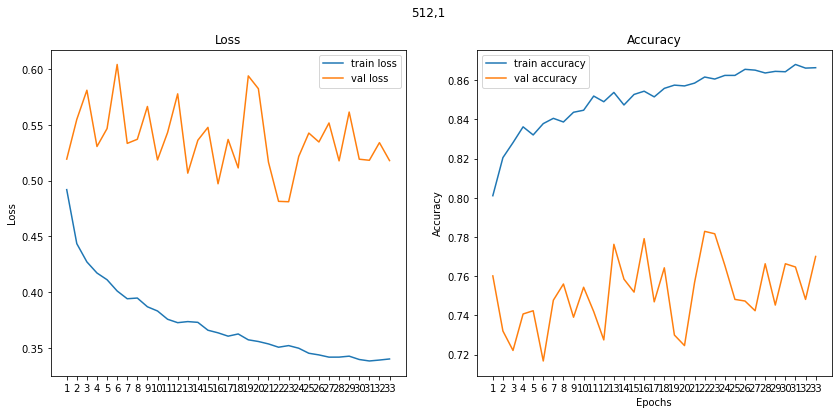

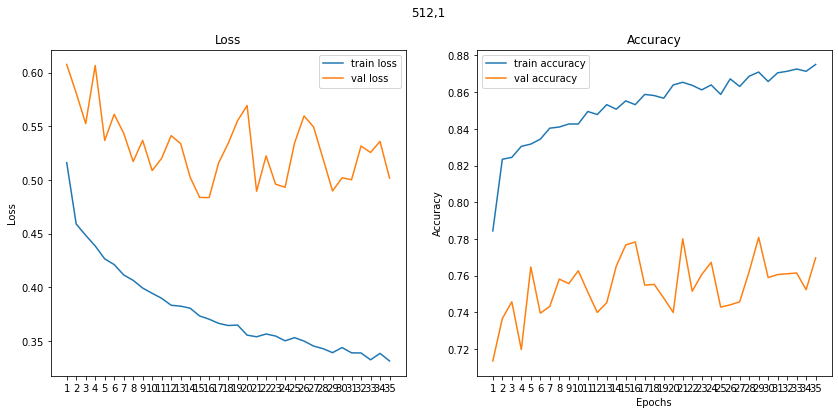

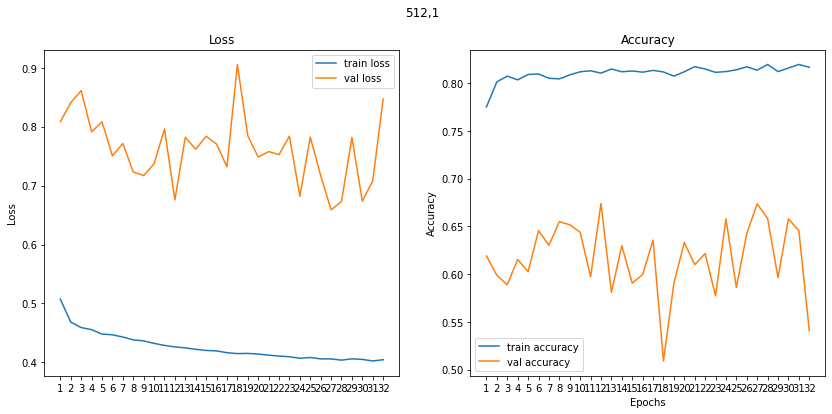

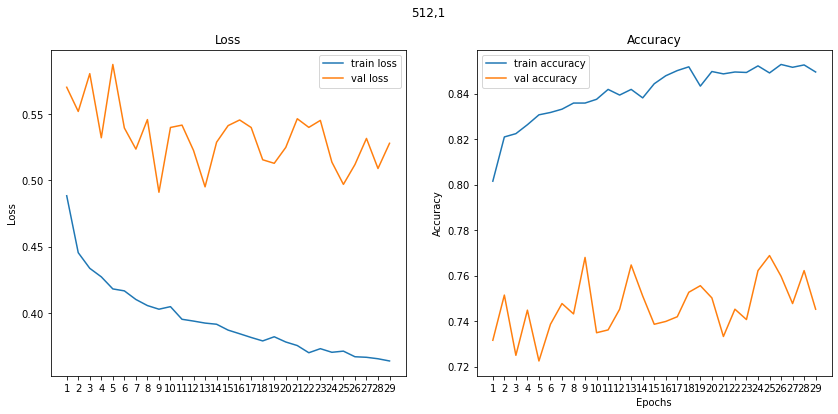

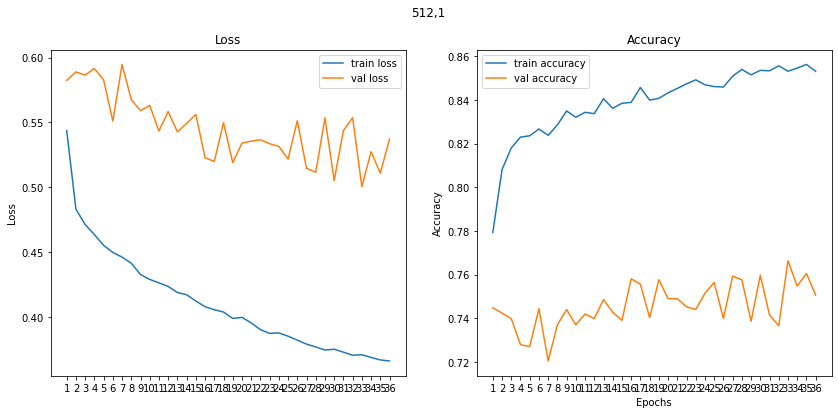

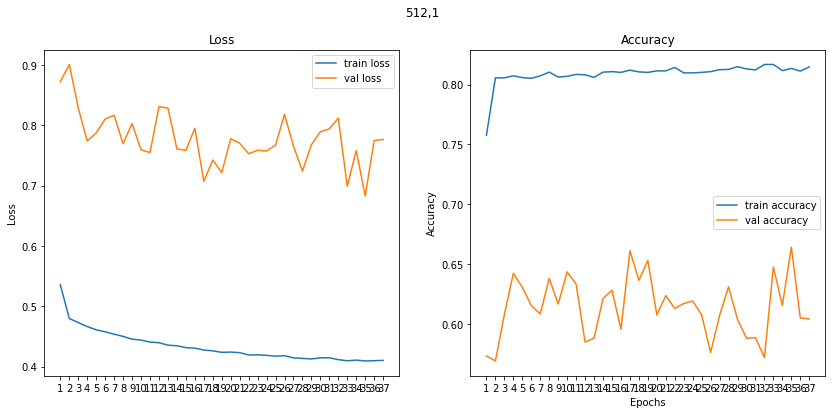

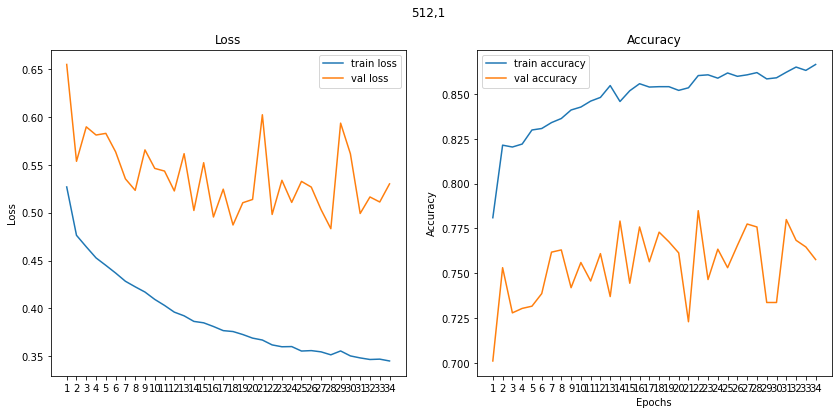

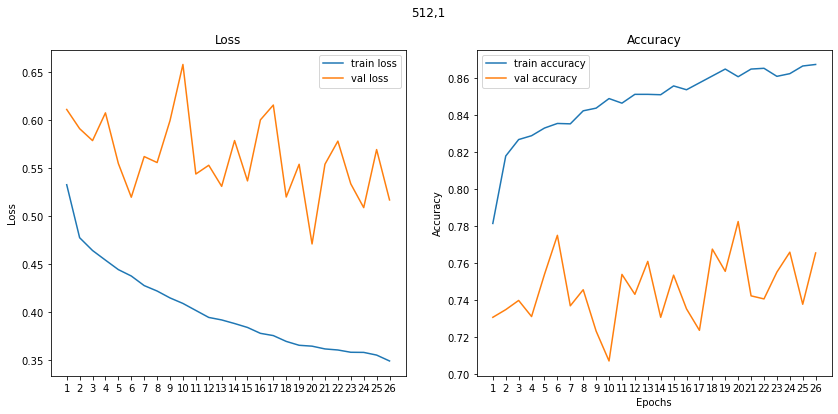

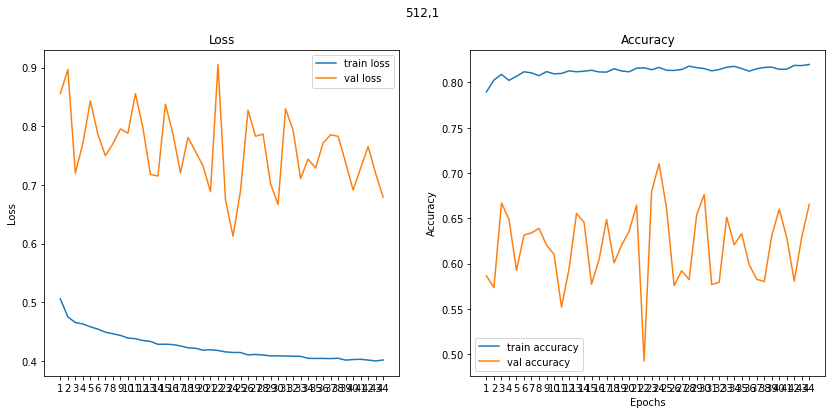

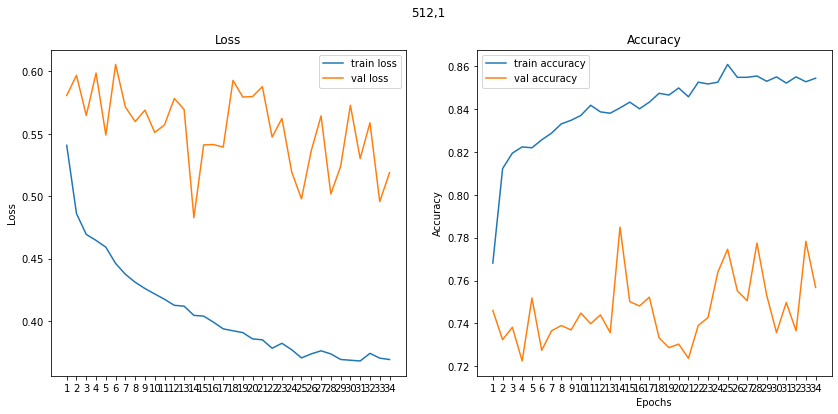

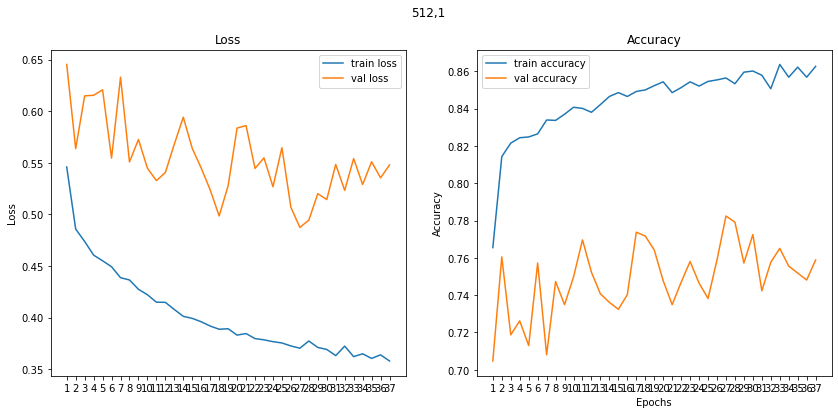

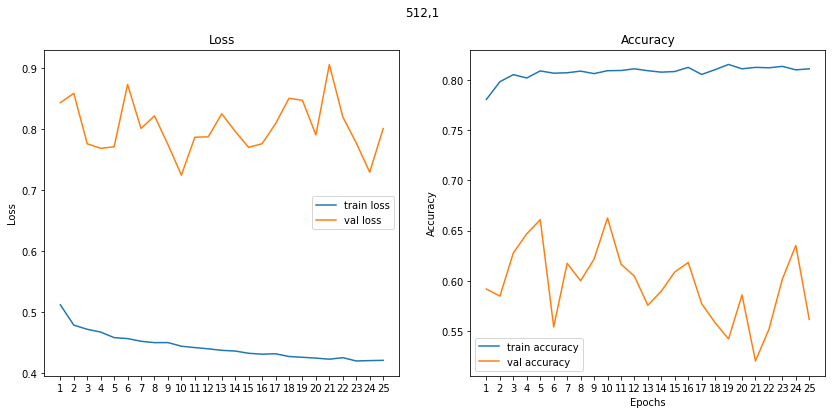

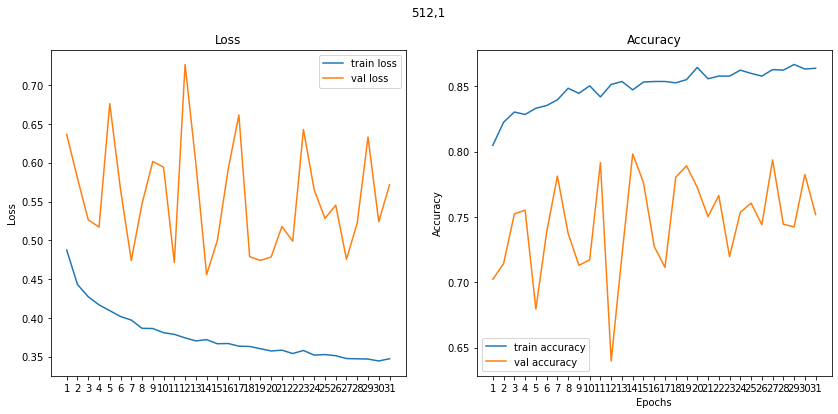

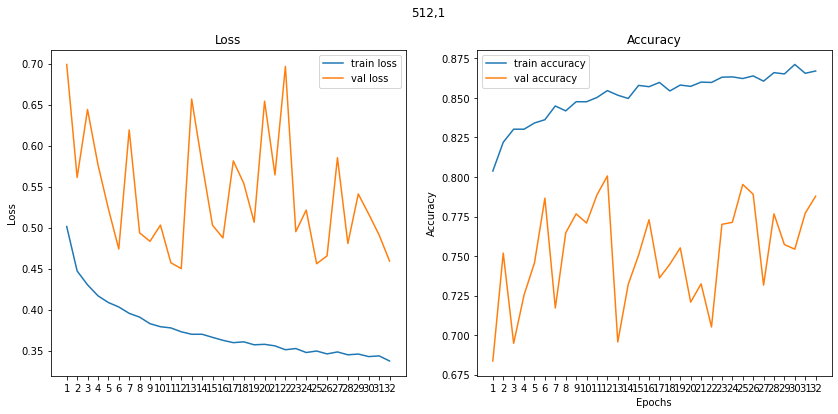

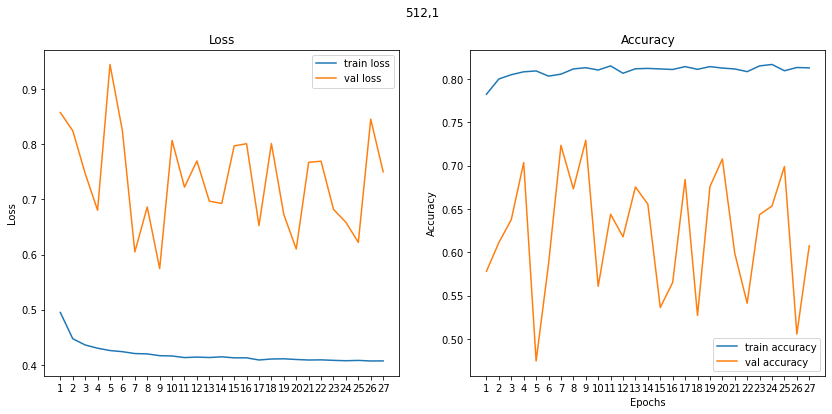

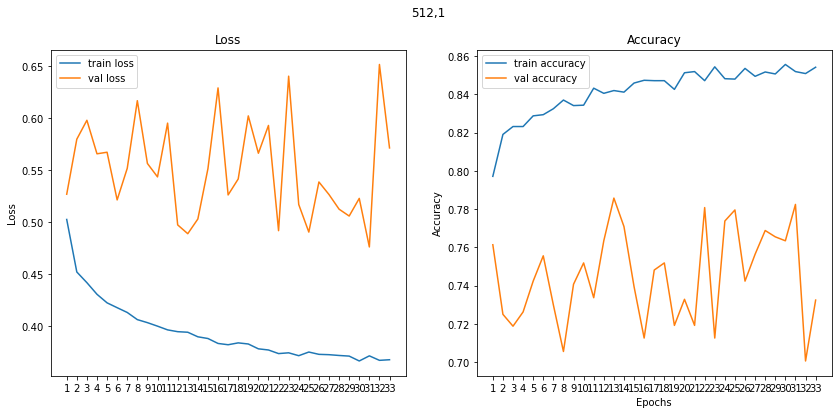

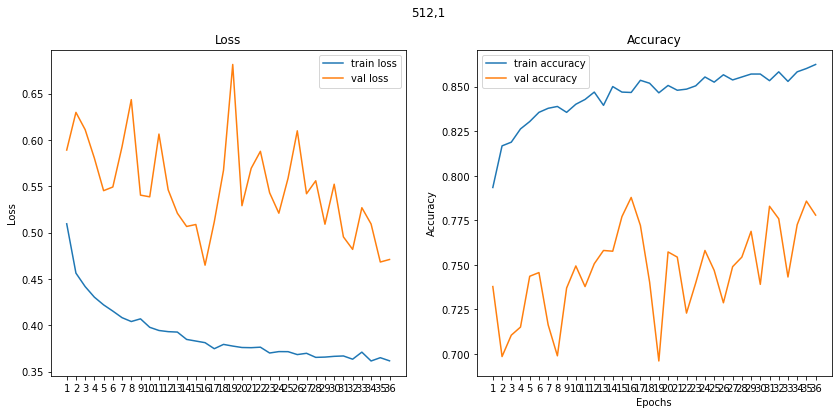

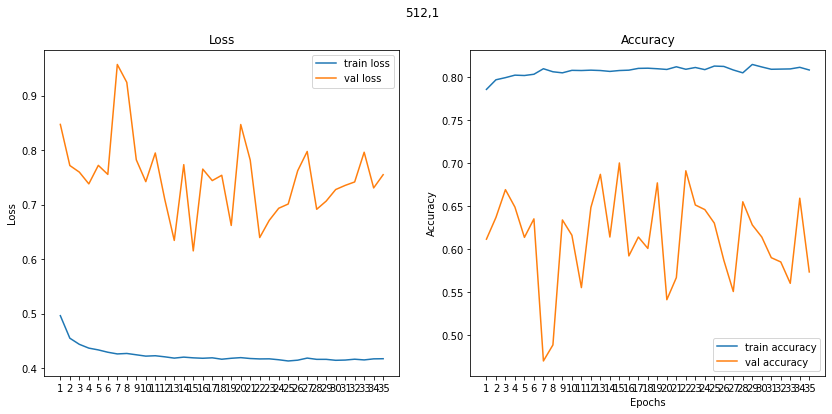

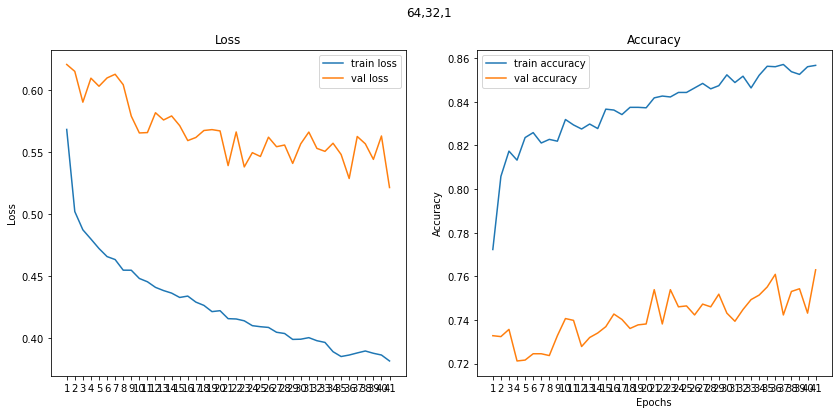

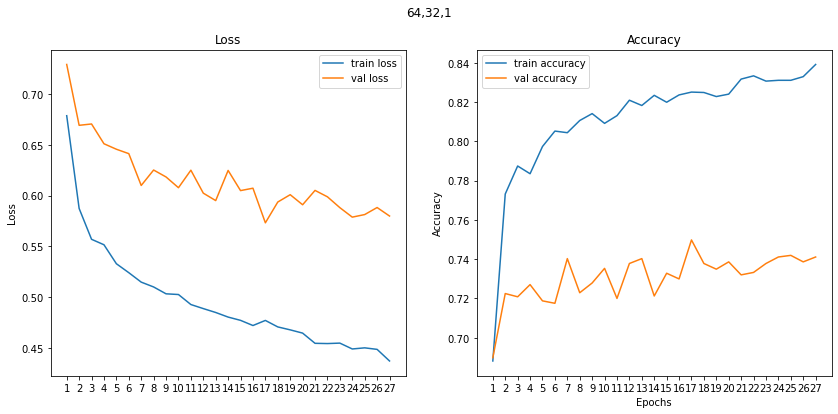

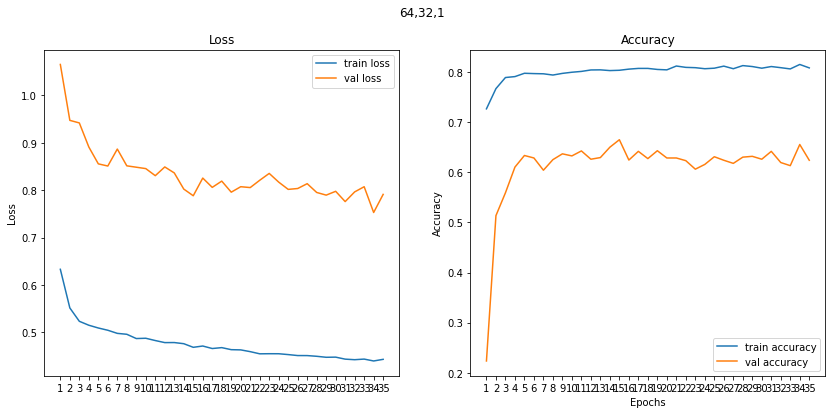

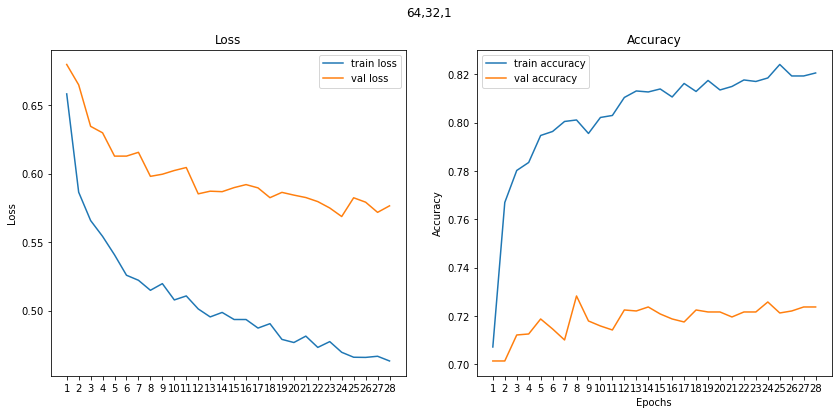

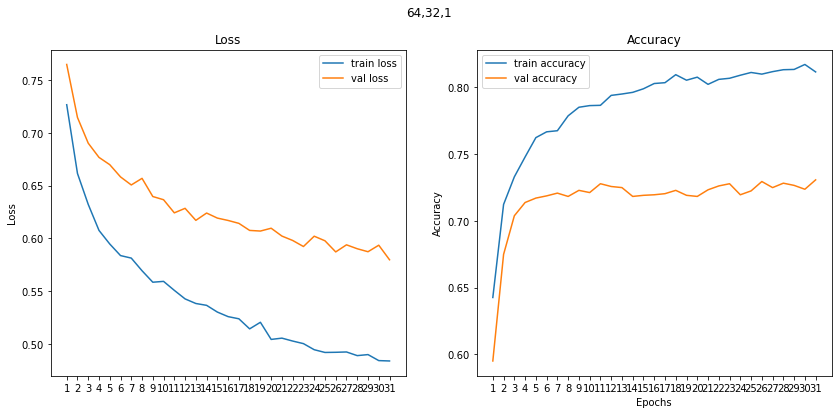

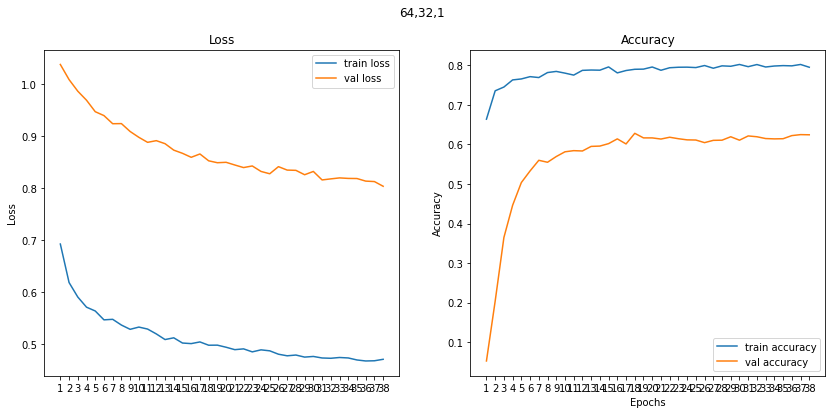

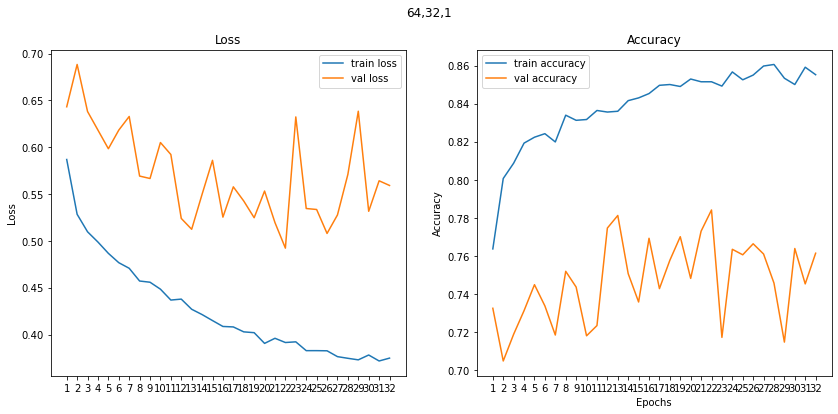

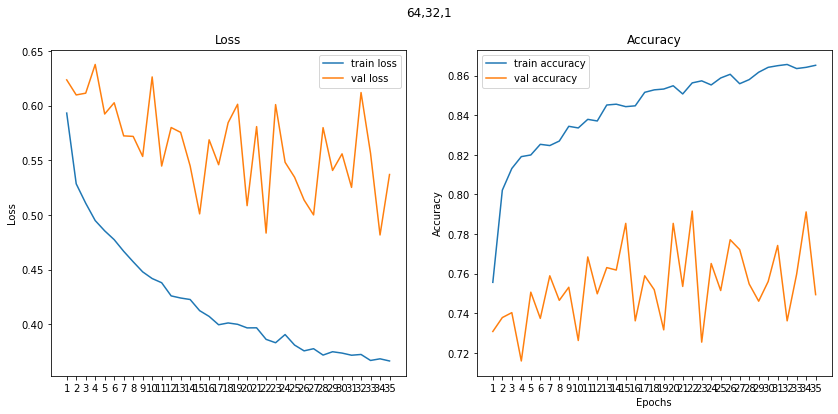

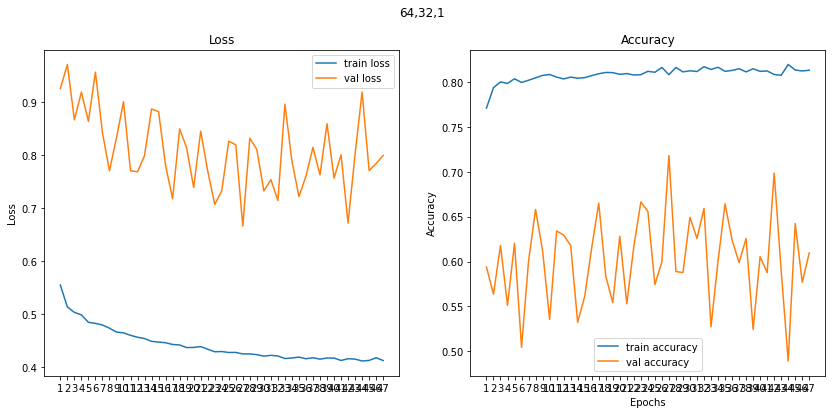

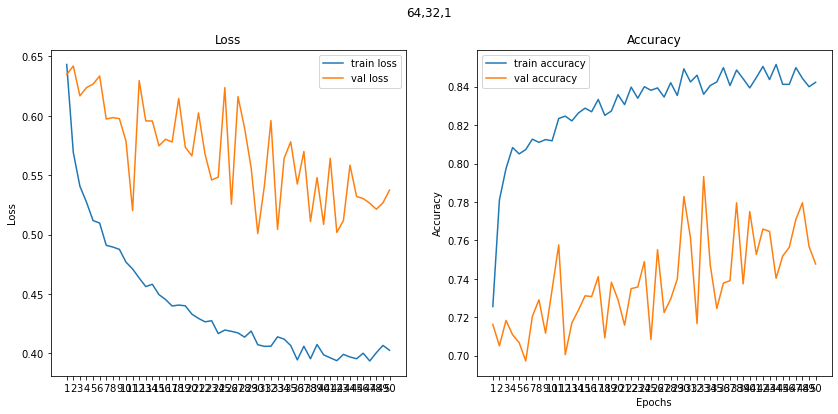

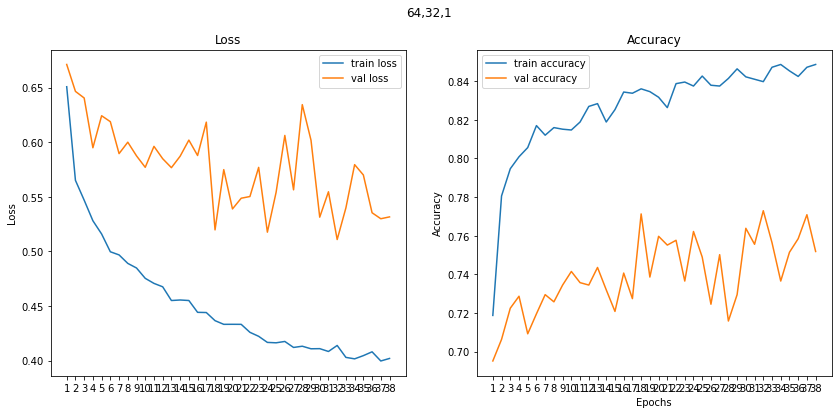

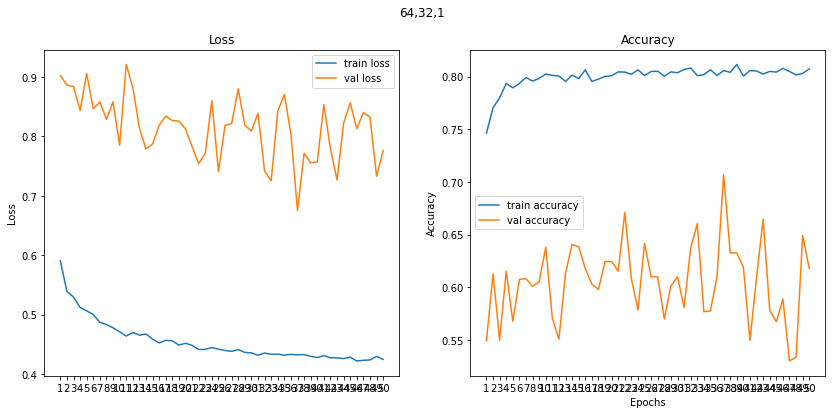

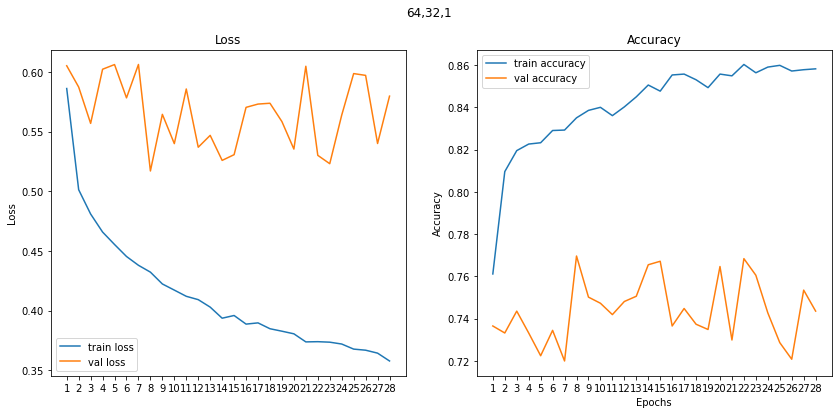

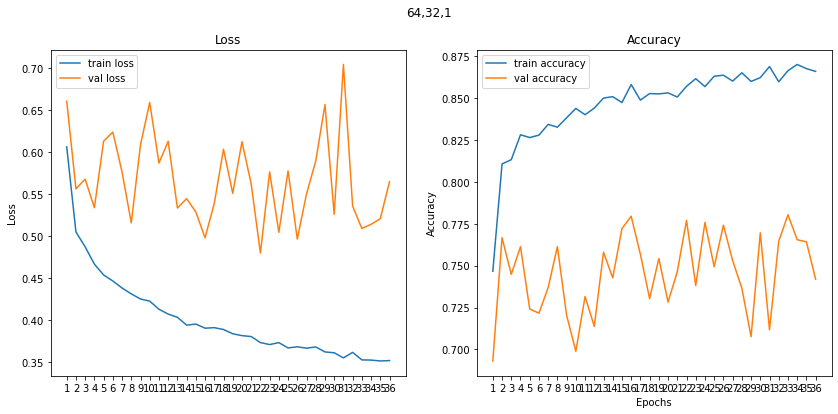

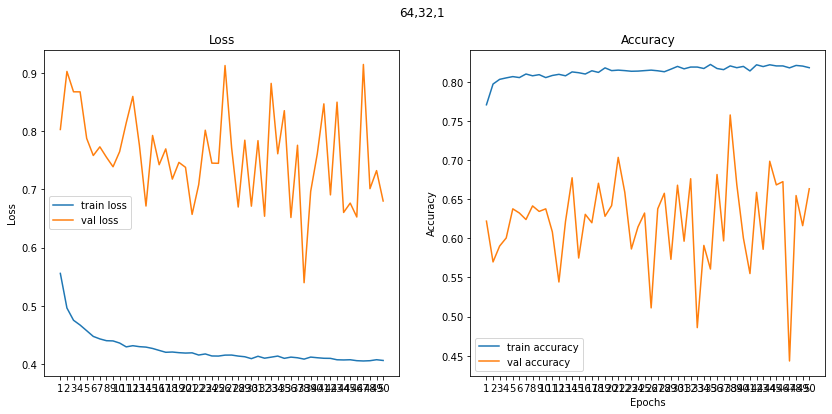

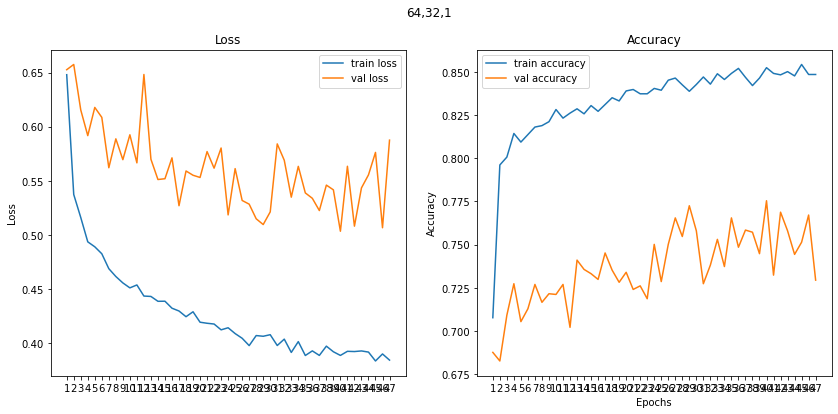

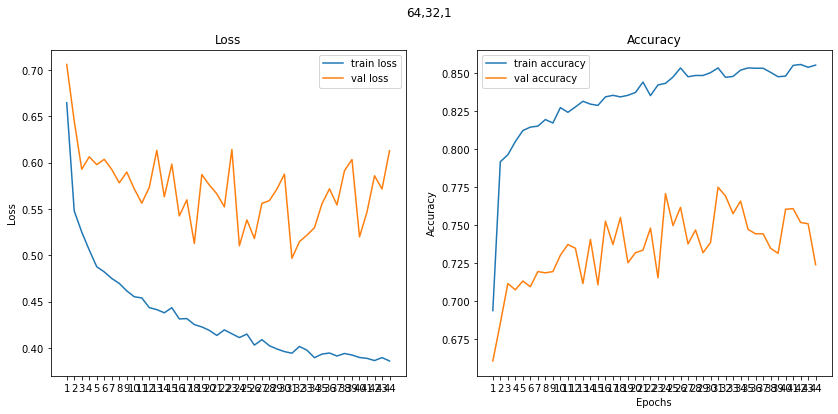

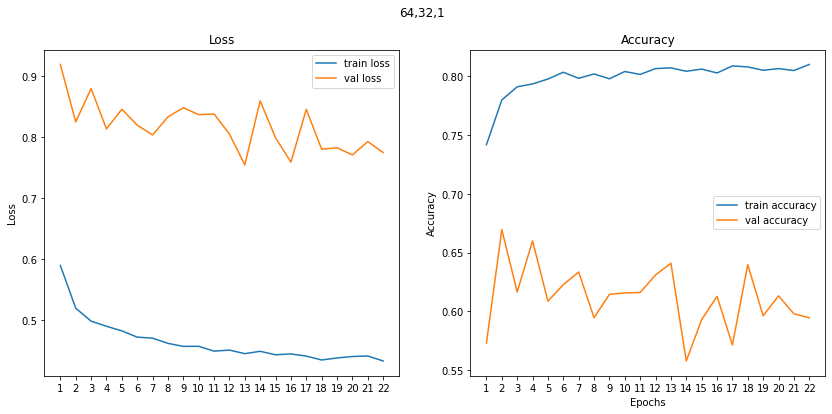

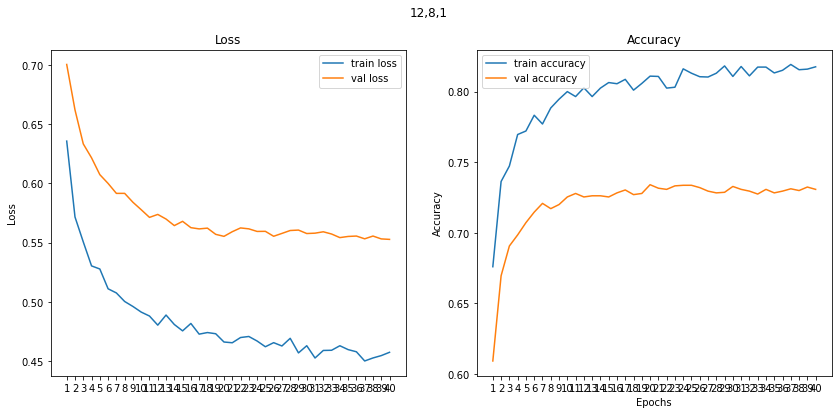

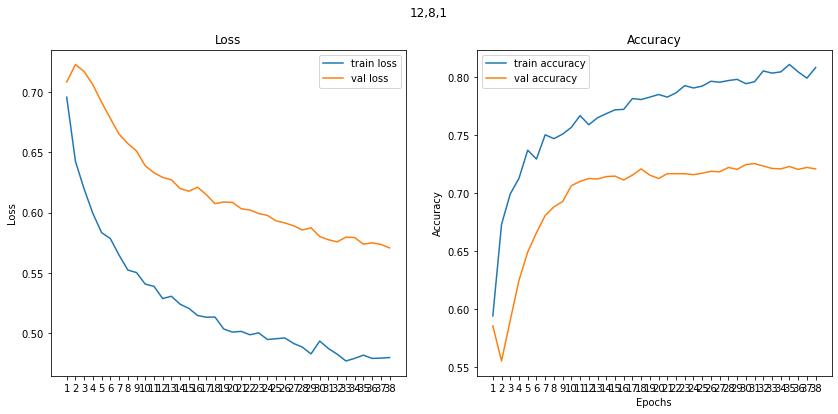

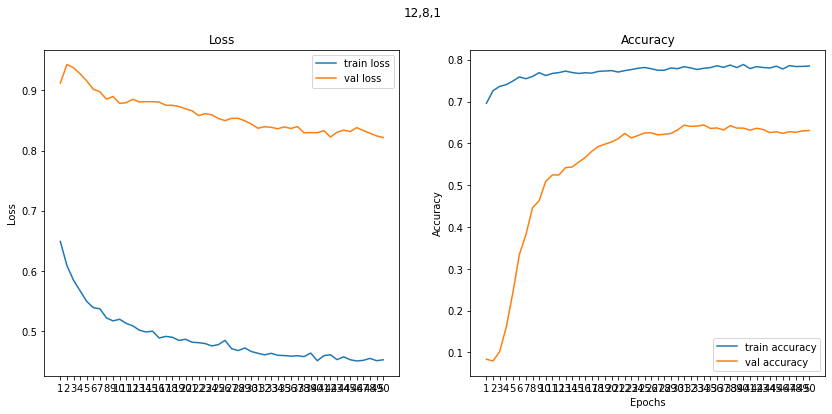

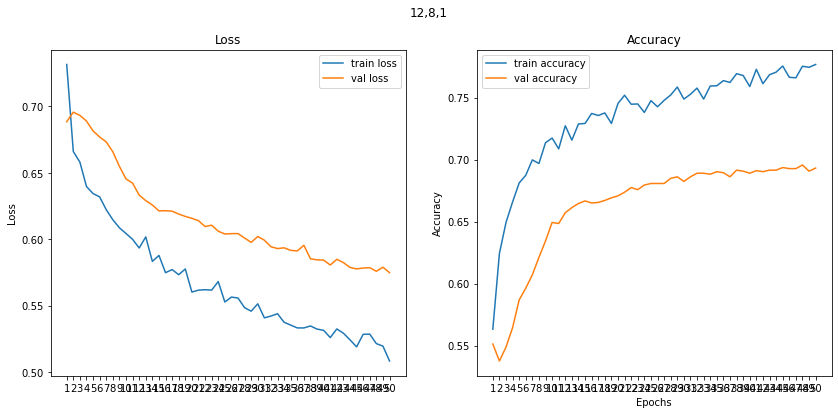

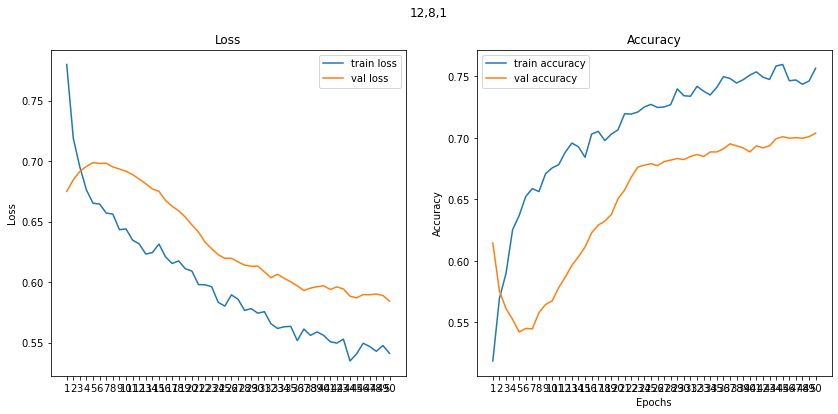

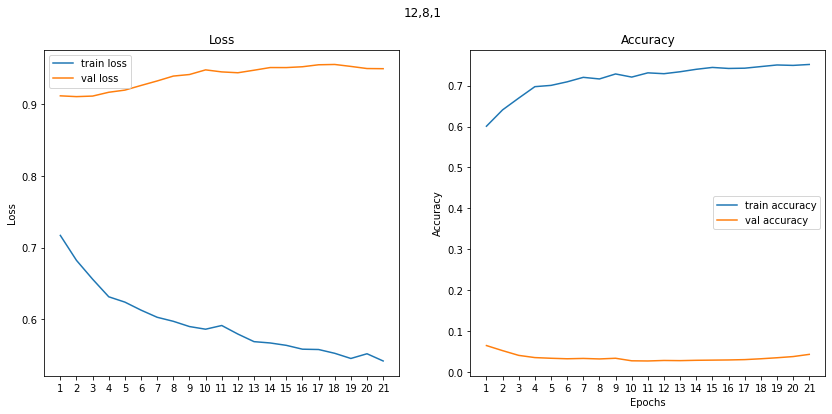

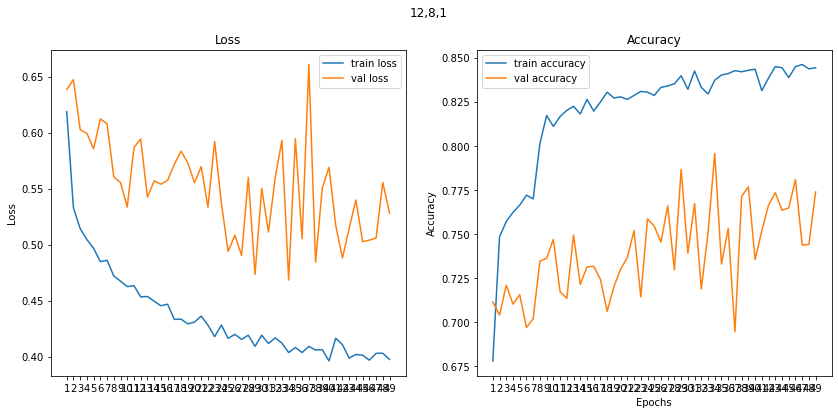

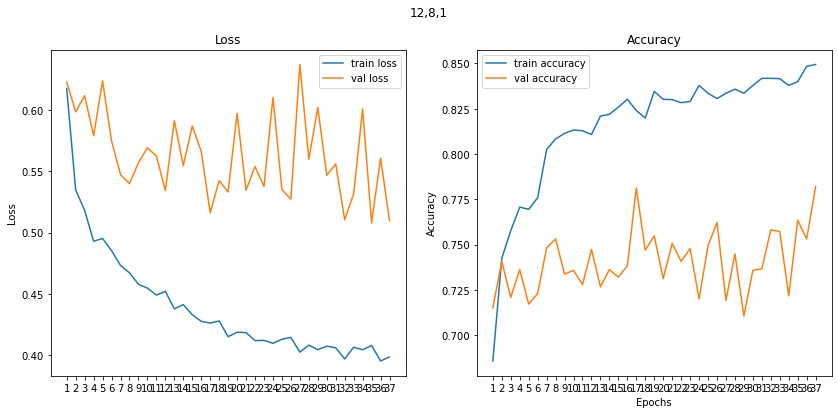

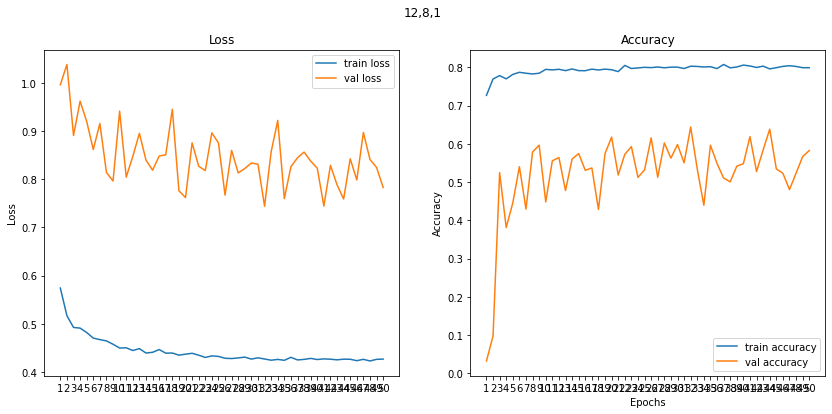

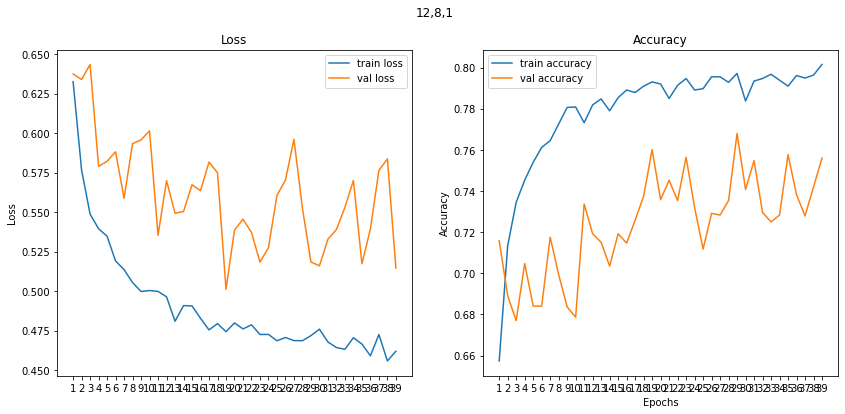

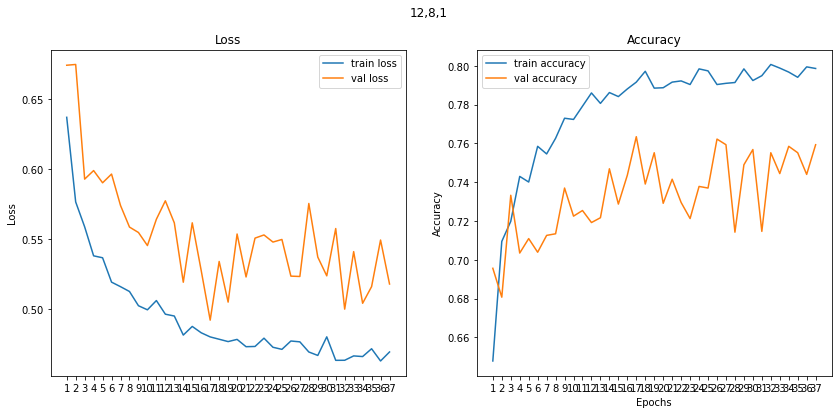

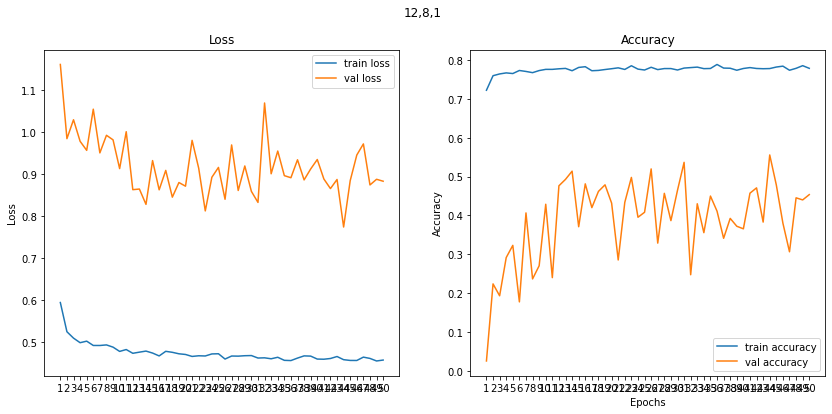

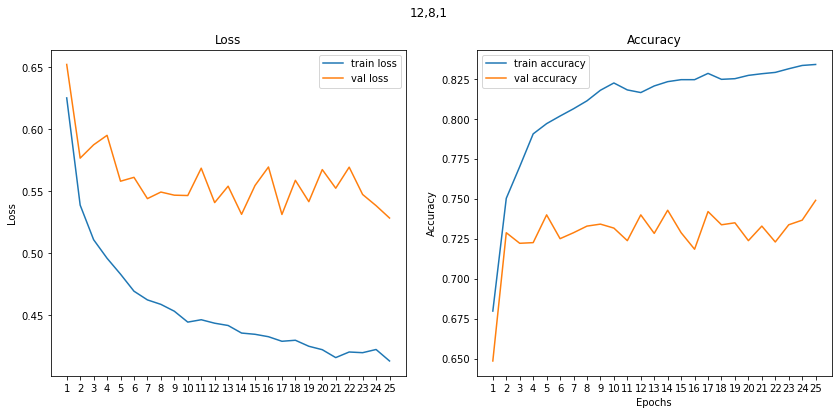

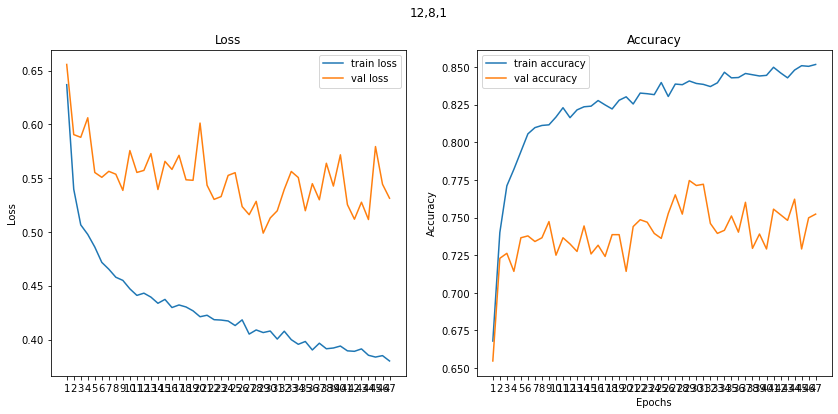

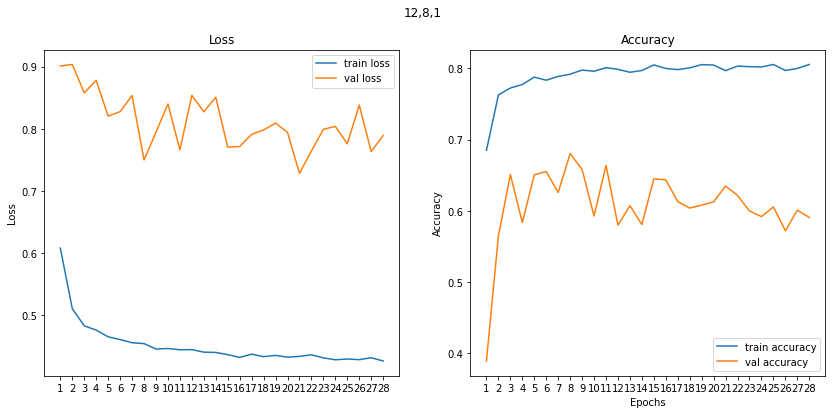

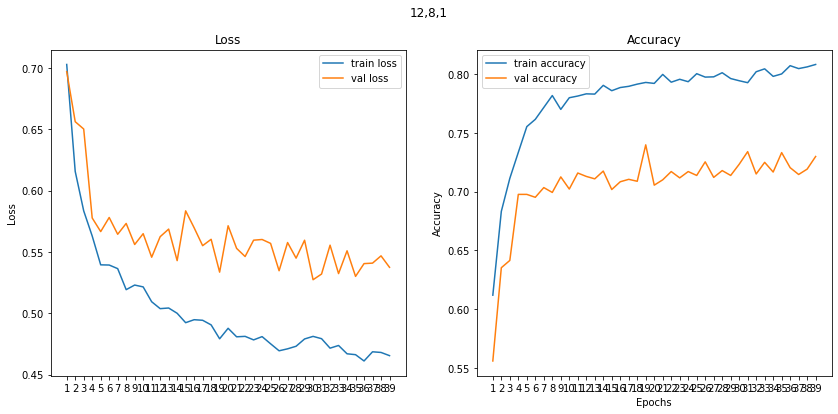

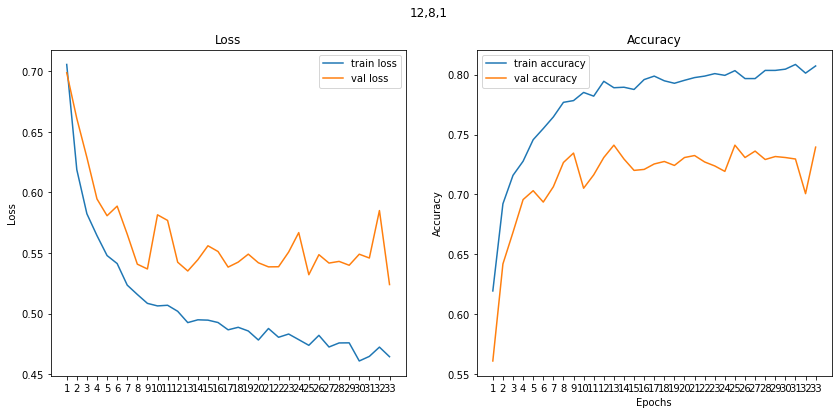

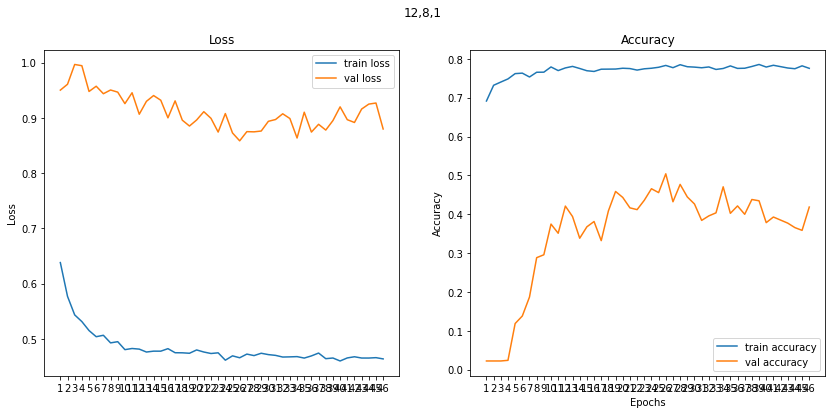

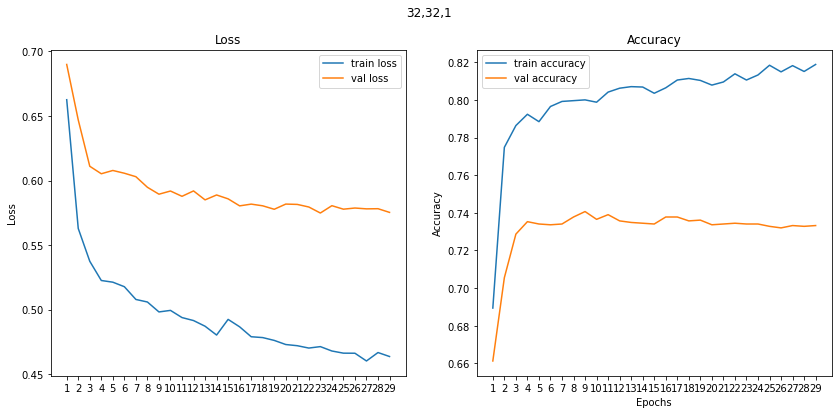

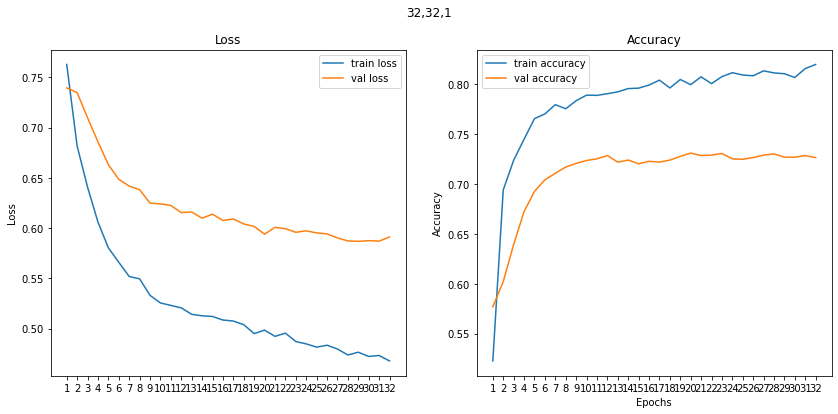

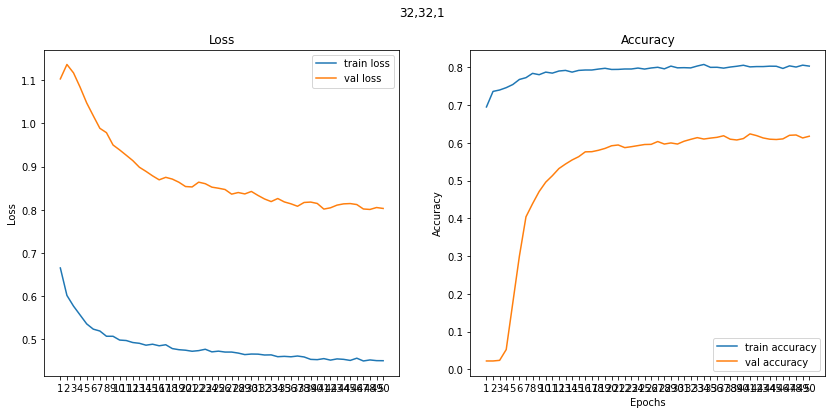

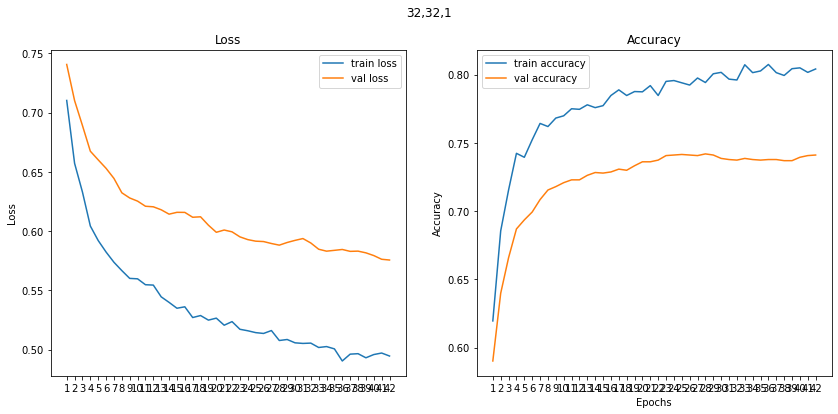

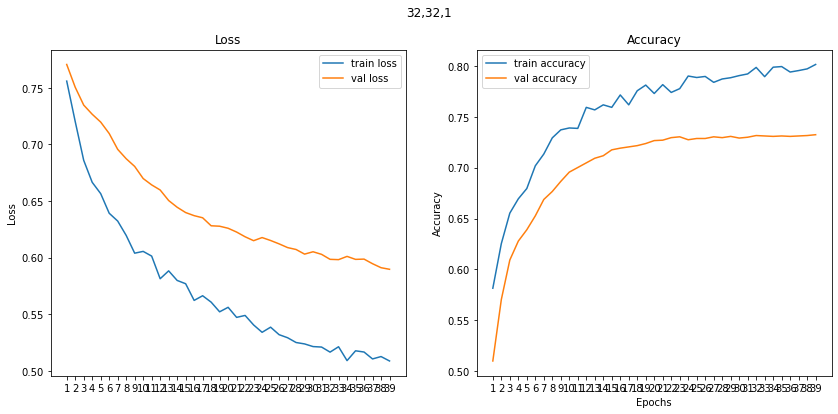

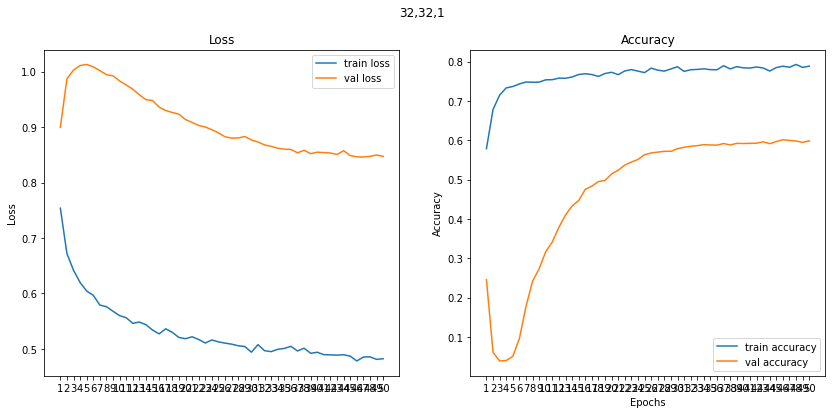

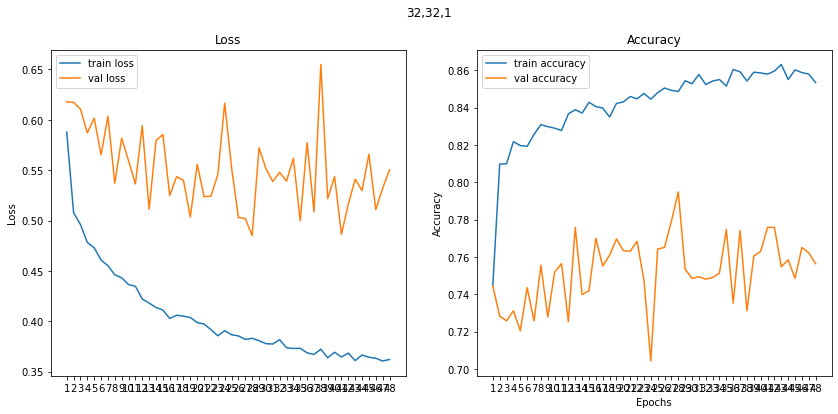

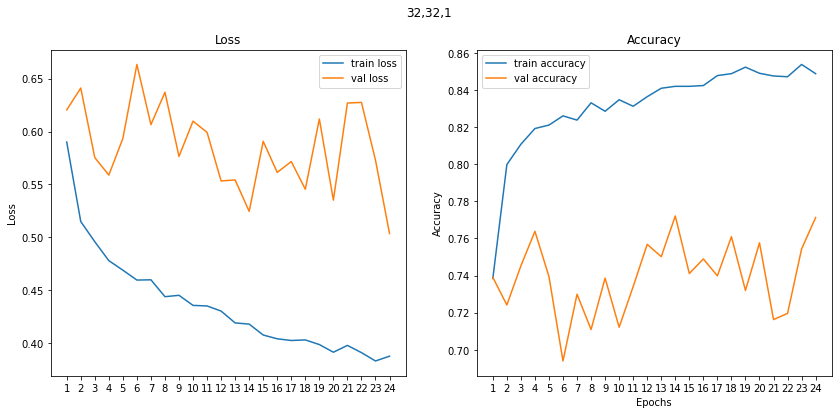

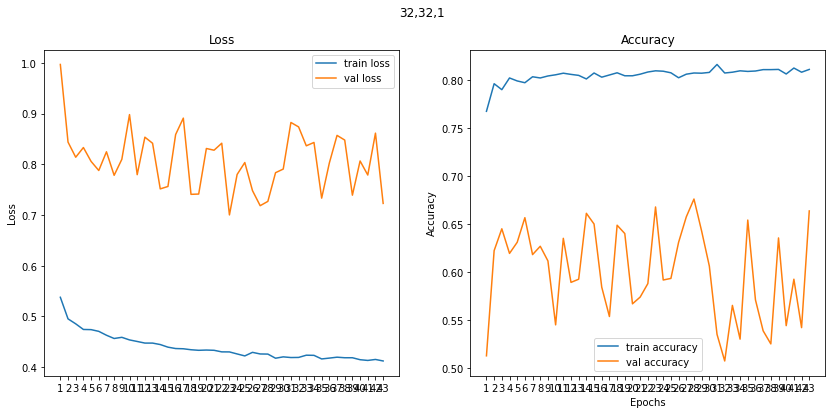

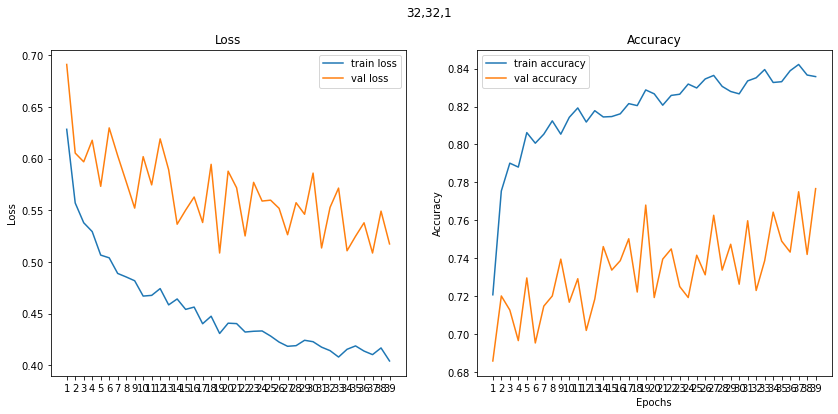

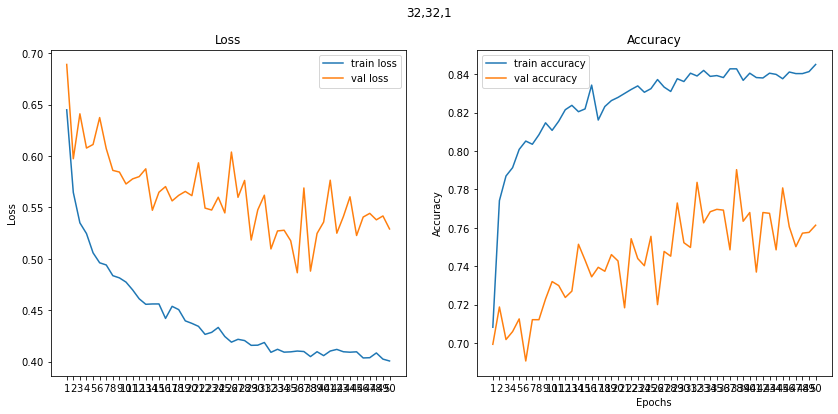

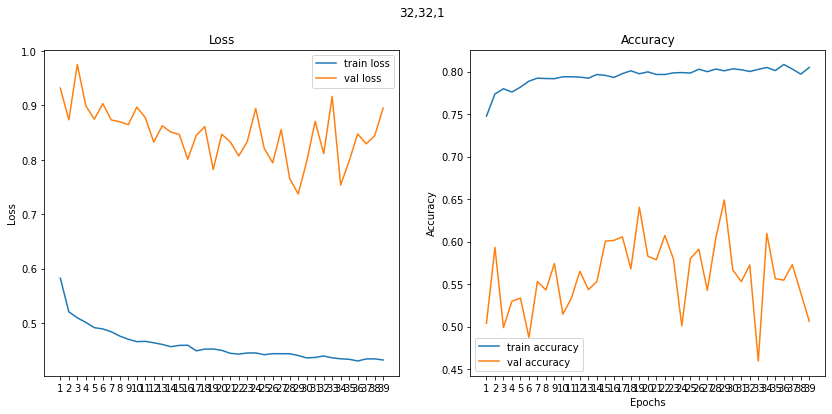

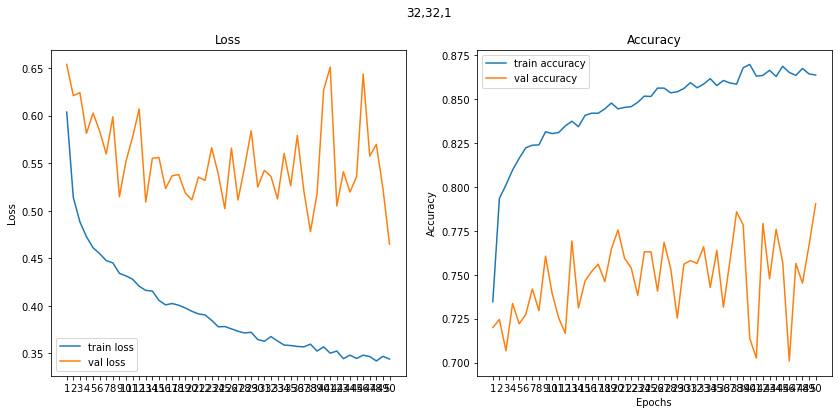

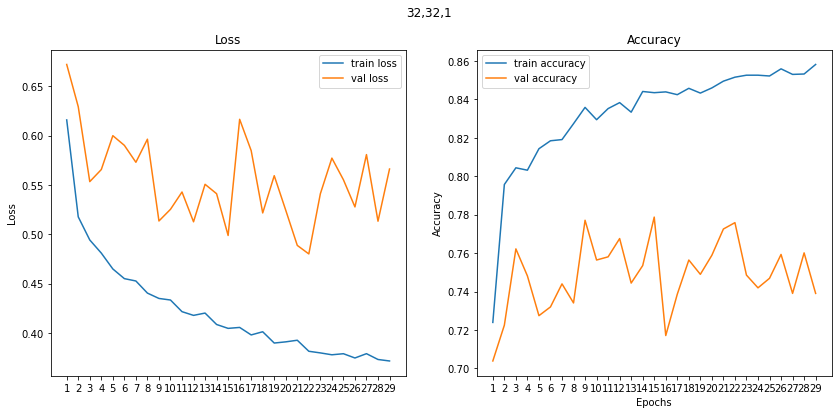

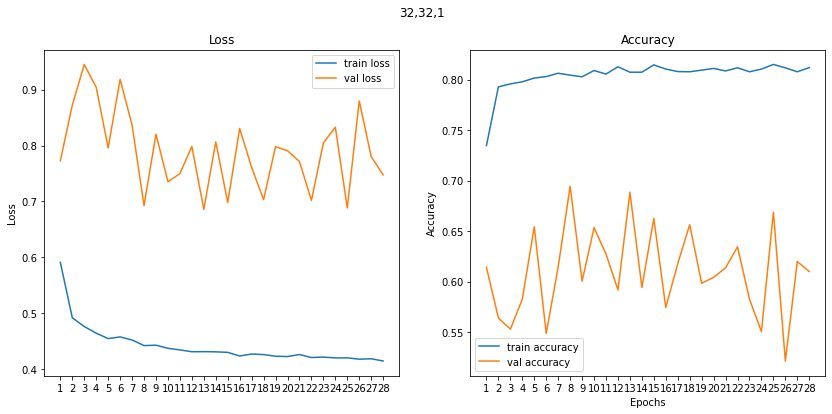

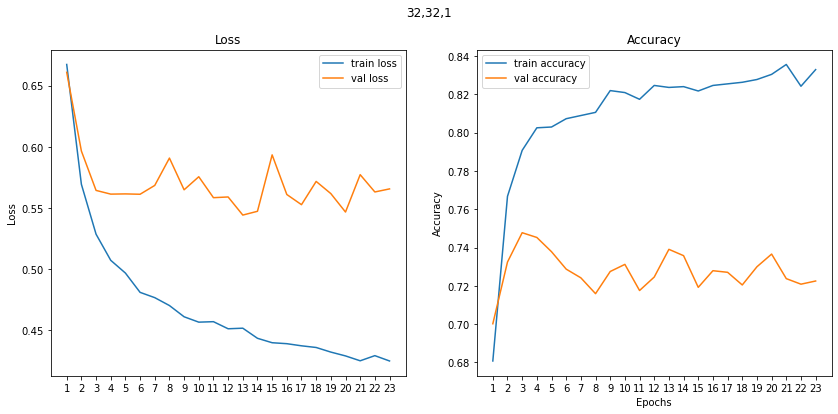

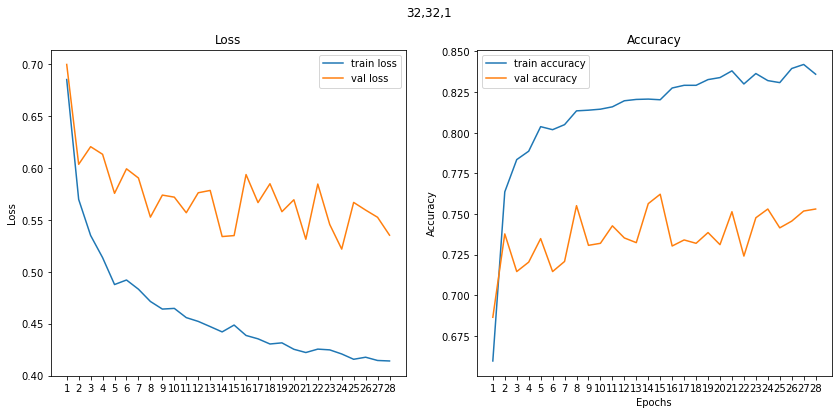

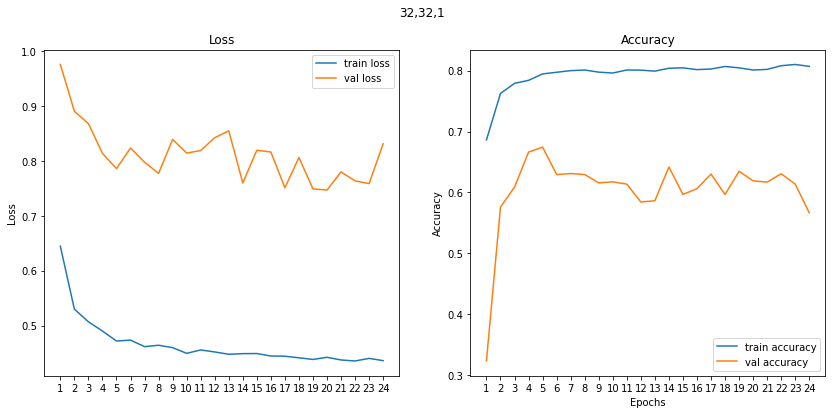

In [468]:
for history in global_history:
    plot_history(history['layers'], history['history'], legend=['train', 'val'])

In [469]:
for history in global_history:
    print(history['layers'], history['optimizer'])
    print('Neural Network:\n {}\n'.format(
        metrics.classification_report(history['prediction'], y_test)))
    print('Neural Network:\n {}\n'.format(
        metrics.confusion_matrix(history['prediction'], y_test)))

512,1 <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>
Neural Network:
               precision    recall  f1-score   support

         0.0       0.77      0.87      0.82      1360
         1.0       0.70      0.54      0.61       750

    accuracy                           0.75      2110
   macro avg       0.74      0.71      0.71      2110
weighted avg       0.75      0.75      0.75      2110


Neural Network:
 [[1189  171]
 [ 347  403]]

512,1 <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>
Neural Network:
               precision    recall  f1-score   support

         0.0       0.79      0.86      0.82      1398
         1.0       0.67      0.54      0.60       712

    accuracy                           0.75      2110
   macro avg       0.73      0.70      0.71      2110
weighted avg       0.75      0.75      0.75      2110


Neural Network:
 [[1207  191]
 [ 329  383]]

512,1 <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>
Neural Network:
               

64,32,1 <class 'tensorflow.python.keras.optimizer_v2.gradient_descent.SGD'>
Neural Network:
               precision    recall  f1-score   support

         0.0       0.84      0.87      0.85      1493
         1.0       0.65      0.60      0.63       617

    accuracy                           0.79      2110
   macro avg       0.75      0.73      0.74      2110
weighted avg       0.79      0.79      0.79      2110


Neural Network:
 [[1292  201]
 [ 244  373]]

64,32,1 <class 'tensorflow.python.keras.optimizer_v2.gradient_descent.SGD'>
Neural Network:
               precision    recall  f1-score   support

         0.0       0.73      0.89      0.80      1253
         1.0       0.76      0.51      0.61       857

    accuracy                           0.73      2110
   macro avg       0.74      0.70      0.70      2110
weighted avg       0.74      0.73      0.72      2110


Neural Network:
 [[1114  139]
 [ 422  435]]

64,32,1 <class 'tensorflow.python.keras.optimizer_v2.gradient_descen

Neural Network:
               precision    recall  f1-score   support

         0.0       0.91      0.83      0.87      1669
         1.0       0.52      0.68      0.59       441

    accuracy                           0.80      2110
   macro avg       0.71      0.76      0.73      2110
weighted avg       0.83      0.80      0.81      2110


Neural Network:
 [[1393  276]
 [ 143  298]]

12,8,1 <class 'tensorflow.python.keras.optimizer_v2.gradient_descent.SGD'>
Neural Network:
               precision    recall  f1-score   support

         0.0       0.75      0.88      0.81      1311
         1.0       0.72      0.52      0.60       799

    accuracy                           0.74      2110
   macro avg       0.73      0.70      0.70      2110
weighted avg       0.74      0.74      0.73      2110


Neural Network:
 [[1149  162]
 [ 387  412]]

12,8,1 <class 'tensorflow.python.keras.optimizer_v2.gradient_descent.SGD'>
Neural Network:
               precision    recall  f1-score   support

Neural Network:
               precision    recall  f1-score   support

         0.0       0.88      0.85      0.86      1581
         1.0       0.59      0.64      0.61       529

    accuracy                           0.80      2110
   macro avg       0.73      0.74      0.74      2110
weighted avg       0.80      0.80      0.80      2110


Neural Network:
 [[1345  236]
 [ 191  338]]

32,32,1 <class 'tensorflow.python.keras.optimizer_v2.gradient_descent.SGD'>
Neural Network:
               precision    recall  f1-score   support

         0.0       0.78      0.87      0.82      1386
         1.0       0.67      0.53      0.60       724

    accuracy                           0.75      2110
   macro avg       0.73      0.70      0.71      2110
weighted avg       0.74      0.75      0.74      2110


Neural Network:
 [[1199  187]
 [ 337  387]]

32,32,1 <class 'tensorflow.python.keras.optimizer_v2.gradient_descent.SGD'>
Neural Network:
               precision    recall  f1-score   suppo

In [470]:
import pandas as pd
df_history = pd.DataFrame(global_history)
df_history.sort_values(by='val_acc', ascending=False,inplace=True)

df_history.groupby(['layers','optimizer', 'dropout', 'batch_size']).mean().sort_values(by='val_acc', ascending=False).drop(['fold'],axis=1)

stoped_at_epoch  \
layers  optimizer                                          dropout batch_size                    
512,1   <class 'tensorflow.python.keras.optimizer_v2.rm... 0.2     32                30.000000   
64,32,1 <class 'tensorflow.python.keras.optimizer_v2.gr... 0.2     32                38.000000   
512,1   <class 'tensorflow.python.keras.optimizer_v2.rm... 0.5     32                34.666667   
        <class 'tensorflow.python.keras.optimizer_v2.gr... 0.2     32                34.666667   
32,32,1 <class 'tensorflow.python.keras.optimizer_v2.rm... 0.2     32                35.666667   
512,1   <class 'tensorflow.python.keras.optimizer_v2.ad... 0.2     32                33.333333   
32,32,1 <class 'tensorflow.python.keras.optimizer_v2.gr... 0.2     32                38.333333   
512,1   <class 'tensorflow.python.keras.optimizer_v2.gr... 0.5     32                32.000000   
64,32,1 <class 'tensorflow.python.keras.optimizer_v2.rm... 0.2     32                38.000000   
                                                           0.5     32                37.666667   
512,1   <class 'tensorflow.python.keras.optimizer_v2.ad... 0.5     32                34.000000   
12,8,1  <class 'tensorflow.python.keras.optimizer_v2.rm... 0.2     32                33.333333   
32,32,1 <class 'tensorflow.python.keras.optimizer_v2.gr... 0.5     32                42.666667   
        <class 'tensorflow.python.keras.optimizer_v2.rm... 0.5     32                25.000000   
64,32,1 <class 'tensorflow.python.keras.optimizer_v2.ad... 0.2     32                34.333333   
12,8,1  <class 'tensorflow.python.keras.optimizer_v2.gr... 0.2     32                45.333333   
64,32,1 <class 'tensorflow.python.keras.optimizer_v2.gr... 0.5     32                46.000000   
32,32,1 <class 'tensorflow.python.keras.optimizer_v2.ad... 0.2     32                37.000000   
12,8,1  <class 'tensorflow.python.keras.optimizer_v2.ad... 0.2     32                42.666667   
64,32,1 <class 'tensorflow.python.keras.optimizer_v2.ad... 0.5     32                32.333333   
32,32,1 <class 'tensorflow.python.keras.optimizer_v2.ad... 0.5     32                43.666667   
12,8,1  <class 'tensorflow.python.keras.optimizer_v2.rm... 0.5     32                39.333333   
        <class 'tensorflow.python.keras.optimizer_v2.gr... 0.5     32                42.000000   
        <class 'tensorflow.python.keras.optimizer_v2.ad... 0.5     32                40.333333   

                                                                               train_loss  \
layers  optimizer                                          dropout batch_size               
512,1   <class 'tensorflow.python.keras.optimizer_v2.rm... 0.2     32            0.403799   
64,32,1 <class 'tensorflow.python.keras.optimizer_v2.gr... 0.2     32            0.412054   
512,1   <class 'tensorflow.python.keras.optimizer_v2.rm... 0.5     32            0.394695   
        <class 'tensorflow.python.keras.optimizer_v2.gr... 0.2     32            0.410569   
32,32,1 <class 'tensorflow.python.keras.optimizer_v2.rm... 0.2     32            0.397664   
512,1   <class 'tensorflow.python.keras.optimizer_v2.ad... 0.2     32            0.384450   
32,32,1 <class 'tensorflow.python.keras.optimizer_v2.gr... 0.2     32            0.411715   
512,1   <class 'tensorflow.python.keras.optimizer_v2.gr... 0.5     32            0.417077   
64,32,1 <class 'tensorflow.python.keras.optimizer_v2.rm... 0.2     32            0.394258   
                                                           0.5     32            0.409473   
512,1   <class 'tensorflow.python.keras.optimizer_v2.ad... 0.5     32            0.409260   
12,8,1  <class 'tensorflow.python.keras.optimizer_v2.rm... 0.2     32            0.416382   
32,32,1 <class 'tensorflow.python.keras.optimizer_v2.gr... 0.5     32            0.396353   
        <class 'tensorflow.python.keras.optimizer_v2.rm... 0.5     32            0.452466   
64,32,1 <class 'tensorflow.python.keras.op

# Nos quedamos con las redes [64, 32, 1] y [512,1] ambas con RMSprop y 0.2 de Drop Out, y las probamos para más epochs.

In [471]:
model = Sequential()
model.add(Dense(X_train.shape[1]))
model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

optimizer = keras.optimizers.RMSprop()
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train,
                    validation_split=0.3,
                    batch_size=32, epochs=500)



Epoch 1/500
159/159 [==============================] - 0s 3ms/step - loss: 0.5517 - accuracy: 0.7690 - val_loss: 0.7944 - val_accuracy: 0.6941
Epoch 2/500
159/159 [==============================] - 0s 2ms/step - loss: 0.4969 - accuracy: 0.7928 - val_loss: 0.7958 - val_accuracy: 0.6569
Epoch 3/500
159/159 [==============================] - 0s 2ms/step - loss: 0.4790 - accuracy: 0.7975 - val_loss: 0.7430 - val_accuracy: 0.6647
Epoch 4/500
159/159 [==============================] - 0s 2ms/step - loss: 0.4682 - accuracy: 0.7967 - val_loss: 0.7158 - val_accuracy: 0.6932
Epoch 5/500
159/159 [==============================] - 0s 2ms/step - loss: 0.4623 - accuracy: 0.7981 - val_loss: 0.7289 - val_accuracy: 0.6771
Epoch 6/500
159/159 [==============================] - 0s 2ms/step - loss: 0.4556 - accuracy: 0.7997 - val_loss: 0.6544 - val_accuracy: 0.7079
Epoch 7/500
159/159 [==============================] - 0s 2ms/step - loss: 0.4527 - accuracy: 0.8011 - val_loss: 0.7062 - val_accuracy: 0.6734

Epoch 58/500
159/159 [==============================] - 0s 2ms/step - loss: 0.4081 - accuracy: 0.8158 - val_loss: 0.6311 - val_accuracy: 0.6725
Epoch 59/500
159/159 [==============================] - 0s 2ms/step - loss: 0.4060 - accuracy: 0.8188 - val_loss: 0.5916 - val_accuracy: 0.6987
Epoch 60/500
159/159 [==============================] - 0s 2ms/step - loss: 0.4079 - accuracy: 0.8168 - val_loss: 0.6425 - val_accuracy: 0.6982
Epoch 61/500
159/159 [==============================] - 0s 2ms/step - loss: 0.4111 - accuracy: 0.8174 - val_loss: 0.6437 - val_accuracy: 0.6950
Epoch 62/500
159/159 [==============================] - 0s 2ms/step - loss: 0.4076 - accuracy: 0.8154 - val_loss: 0.6476 - val_accuracy: 0.6886
Epoch 63/500
159/159 [==============================] - 0s 2ms/step - loss: 0.4040 - accuracy: 0.8180 - val_loss: 0.6253 - val_accuracy: 0.7069
Epoch 64/500
159/159 [==============================] - 0s 2ms/step - loss: 0.4090 - accuracy: 0.8215 - val_loss: 0.5820 - val_accuracy:

Epoch 115/500
159/159 [==============================] - 0s 2ms/step - loss: 0.4024 - accuracy: 0.8251 - val_loss: 0.6103 - val_accuracy: 0.7010
Epoch 116/500
159/159 [==============================] - 0s 2ms/step - loss: 0.3987 - accuracy: 0.8298 - val_loss: 0.6237 - val_accuracy: 0.6826
Epoch 117/500
159/159 [==============================] - 0s 2ms/step - loss: 0.3991 - accuracy: 0.8241 - val_loss: 0.6178 - val_accuracy: 0.6762
Epoch 118/500
159/159 [==============================] - 0s 2ms/step - loss: 0.3964 - accuracy: 0.8267 - val_loss: 0.5052 - val_accuracy: 0.7689
Epoch 119/500
159/159 [==============================] - 0s 2ms/step - loss: 0.3983 - accuracy: 0.8290 - val_loss: 0.5476 - val_accuracy: 0.7529
Epoch 120/500
159/159 [==============================] - 0s 2ms/step - loss: 0.3968 - accuracy: 0.8261 - val_loss: 0.5663 - val_accuracy: 0.7157
Epoch 121/500
159/159 [==============================] - 0s 2ms/step - loss: 0.3941 - accuracy: 0.8298 - val_loss: 0.5628 - val_ac

159/159 [==============================] - 0s 2ms/step - loss: 0.3915 - accuracy: 0.8336 - val_loss: 0.5879 - val_accuracy: 0.7097
Epoch 172/500
159/159 [==============================] - 0s 2ms/step - loss: 0.3940 - accuracy: 0.8314 - val_loss: 0.5047 - val_accuracy: 0.7680
Epoch 173/500
159/159 [==============================] - 0s 2ms/step - loss: 0.3930 - accuracy: 0.8320 - val_loss: 0.5780 - val_accuracy: 0.7106
Epoch 174/500
159/159 [==============================] - 0s 2ms/step - loss: 0.3955 - accuracy: 0.8310 - val_loss: 0.5175 - val_accuracy: 0.7717
Epoch 175/500
159/159 [==============================] - 0s 2ms/step - loss: 0.3961 - accuracy: 0.8322 - val_loss: 0.6612 - val_accuracy: 0.6376
Epoch 176/500
159/159 [==============================] - 0s 2ms/step - loss: 0.3926 - accuracy: 0.8328 - val_loss: 0.6223 - val_accuracy: 0.6996
Epoch 177/500
159/159 [==============================] - 0s 2ms/step - loss: 0.3931 - accuracy: 0.8340 - val_loss: 0.6028 - val_accuracy: 0.7134

159/159 [==============================] - 0s 2ms/step - loss: 0.3919 - accuracy: 0.8387 - val_loss: 0.5466 - val_accuracy: 0.7414
Epoch 228/500
159/159 [==============================] - 0s 2ms/step - loss: 0.3881 - accuracy: 0.8377 - val_loss: 0.4910 - val_accuracy: 0.7694
Epoch 229/500
159/159 [==============================] - 0s 2ms/step - loss: 0.3873 - accuracy: 0.8381 - val_loss: 0.5690 - val_accuracy: 0.7460
Epoch 230/500
159/159 [==============================] - 0s 2ms/step - loss: 0.3907 - accuracy: 0.8381 - val_loss: 0.5936 - val_accuracy: 0.7143
Epoch 231/500
159/159 [==============================] - 0s 2ms/step - loss: 0.3876 - accuracy: 0.8401 - val_loss: 0.5749 - val_accuracy: 0.7276
Epoch 232/500
159/159 [==============================] - 0s 2ms/step - loss: 0.3881 - accuracy: 0.8395 - val_loss: 0.5562 - val_accuracy: 0.7506
Epoch 233/500
159/159 [==============================] - 0s 2ms/step - loss: 0.3845 - accuracy: 0.8401 - val_loss: 0.4917 - val_accuracy: 0.7905

159/159 [==============================] - 0s 2ms/step - loss: 0.3865 - accuracy: 0.8412 - val_loss: 0.5414 - val_accuracy: 0.7409
Epoch 284/500
159/159 [==============================] - 0s 2ms/step - loss: 0.3858 - accuracy: 0.8422 - val_loss: 0.6525 - val_accuracy: 0.6780
Epoch 285/500
159/159 [==============================] - 0s 2ms/step - loss: 0.3837 - accuracy: 0.8434 - val_loss: 0.6342 - val_accuracy: 0.6941
Epoch 286/500
159/159 [==============================] - 0s 2ms/step - loss: 0.3796 - accuracy: 0.8442 - val_loss: 0.5684 - val_accuracy: 0.7138
Epoch 287/500
159/159 [==============================] - 0s 2ms/step - loss: 0.3826 - accuracy: 0.8458 - val_loss: 0.4783 - val_accuracy: 0.7864
Epoch 288/500
159/159 [==============================] - ETA: 0s - loss: 0.3868 - accuracy: 0.83 - 0s 2ms/step - loss: 0.3868 - accuracy: 0.8379 - val_loss: 0.5402 - val_accuracy: 0.7611
Epoch 289/500
159/159 [==============================] - 0s 2ms/step - loss: 0.3871 - accuracy: 0.8403

159/159 [==============================] - 0s 2ms/step - loss: 0.3854 - accuracy: 0.8450 - val_loss: 0.5717 - val_accuracy: 0.7166
Epoch 340/500
159/159 [==============================] - 0s 2ms/step - loss: 0.3889 - accuracy: 0.8397 - val_loss: 0.6677 - val_accuracy: 0.6647
Epoch 341/500
159/159 [==============================] - 0s 2ms/step - loss: 0.3800 - accuracy: 0.8438 - val_loss: 0.5010 - val_accuracy: 0.7630
Epoch 342/500
159/159 [==============================] - 0s 2ms/step - loss: 0.3822 - accuracy: 0.8444 - val_loss: 0.5376 - val_accuracy: 0.7492
Epoch 343/500
159/159 [==============================] - 0s 2ms/step - loss: 0.3873 - accuracy: 0.8416 - val_loss: 0.5732 - val_accuracy: 0.7203
Epoch 344/500
159/159 [==============================] - 0s 2ms/step - loss: 0.3898 - accuracy: 0.8410 - val_loss: 0.4811 - val_accuracy: 0.7726
Epoch 345/500
159/159 [==============================] - 0s 2ms/step - loss: 0.3845 - accuracy: 0.8454 - val_loss: 0.5014 - val_accuracy: 0.7689

159/159 [==============================] - 0s 2ms/step - loss: 0.3862 - accuracy: 0.8422 - val_loss: 0.6008 - val_accuracy: 0.7088
Epoch 396/500
159/159 [==============================] - 0s 2ms/step - loss: 0.3856 - accuracy: 0.8436 - val_loss: 0.5255 - val_accuracy: 0.7552
Epoch 397/500
159/159 [==============================] - 0s 2ms/step - loss: 0.3936 - accuracy: 0.8432 - val_loss: 0.5150 - val_accuracy: 0.7749
Epoch 398/500
159/159 [==============================] - 0s 2ms/step - loss: 0.3830 - accuracy: 0.8450 - val_loss: 0.5342 - val_accuracy: 0.7570
Epoch 399/500
159/159 [==============================] - 0s 2ms/step - loss: 0.3792 - accuracy: 0.8501 - val_loss: 0.4979 - val_accuracy: 0.7781
Epoch 400/500
159/159 [==============================] - 0s 2ms/step - loss: 0.3851 - accuracy: 0.8454 - val_loss: 0.6096 - val_accuracy: 0.7019
Epoch 401/500
159/159 [==============================] - 0s 2ms/step - loss: 0.3893 - accuracy: 0.8464 - val_loss: 0.5710 - val_accuracy: 0.7157

159/159 [==============================] - 0s 2ms/step - loss: 0.3828 - accuracy: 0.8452 - val_loss: 0.6628 - val_accuracy: 0.6509
Epoch 452/500
159/159 [==============================] - 0s 2ms/step - loss: 0.3886 - accuracy: 0.8436 - val_loss: 0.6173 - val_accuracy: 0.6950
Epoch 453/500
159/159 [==============================] - 0s 2ms/step - loss: 0.3830 - accuracy: 0.8472 - val_loss: 0.6255 - val_accuracy: 0.7023
Epoch 454/500
159/159 [==============================] - 0s 2ms/step - loss: 0.3853 - accuracy: 0.8460 - val_loss: 0.5878 - val_accuracy: 0.7258
Epoch 455/500
159/159 [==============================] - 0s 2ms/step - loss: 0.3903 - accuracy: 0.8420 - val_loss: 0.5272 - val_accuracy: 0.7593
Epoch 456/500
159/159 [==============================] - 0s 2ms/step - loss: 0.3873 - accuracy: 0.8438 - val_loss: 0.5211 - val_accuracy: 0.7611
Epoch 457/500
159/159 [==============================] - 0s 2ms/step - loss: 0.3899 - accuracy: 0.8412 - val_loss: 0.6399 - val_accuracy: 0.6684

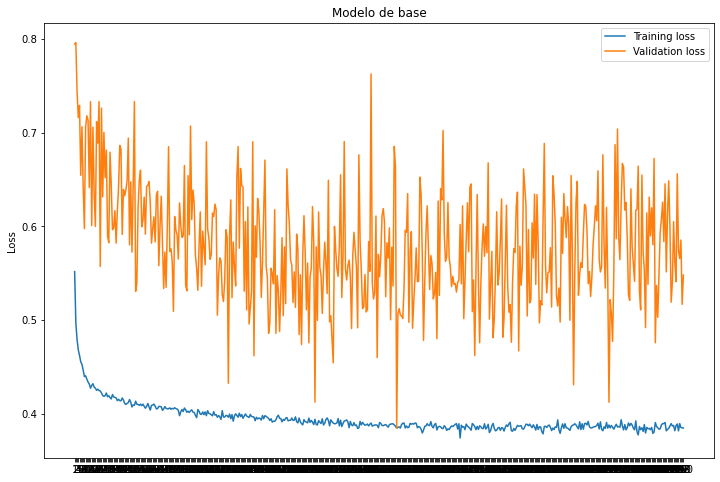

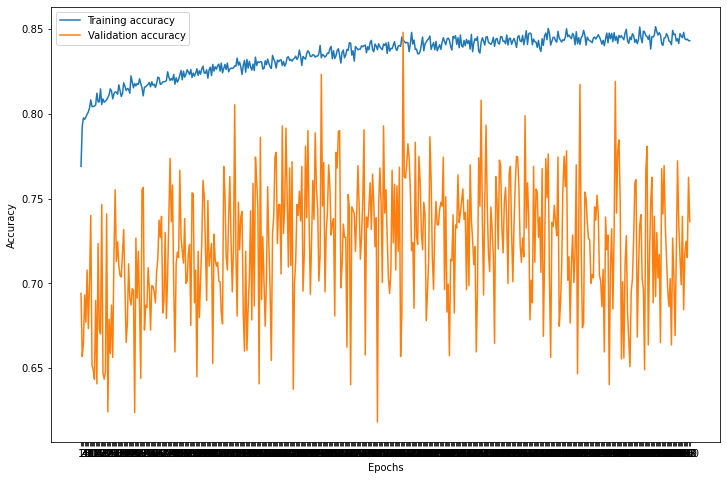

In [472]:

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12,8))
plt.title('Modelo de base')
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.xticks(ticks=epochs)
plt.ylabel('Loss')
plt.legend(['Training loss', 'Validation loss'])

plt.figure(figsize=(12,8))
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.xticks(ticks=list(epochs))
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training accuracy', 'Validation accuracy']);


In [473]:
yprednn=model.predict(X_test)
yprednn=yprednn.round()
print('Neural Network:\n {}\n'.format(
    metrics.classification_report(yprednn, y_test)))
print('Neural Network:\n {}\n'.format(
    metrics.confusion_matrix(yprednn, y_test)))

Neural Network:
               precision    recall  f1-score   support

         0.0       0.88      0.83      0.85      1629
         1.0       0.51      0.60      0.55       481

    accuracy                           0.78      2110
   macro avg       0.69      0.72      0.70      2110
weighted avg       0.79      0.78      0.78      2110


Neural Network:
 [[1346  283]
 [ 190  291]]



Confusion matrix, without normalization
[[1346  190]
 [ 283  291]]


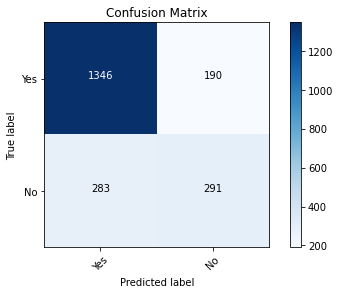

In [474]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
cm = confusion_matrix(y_true=y_test, y_pred=yprednn)


def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
plot_confusion_matrix(cm=cm, classes=['Yes', 'No'], title='Confusion Matrix')

# # Ahora probamos con la red de [512, 1]

In [475]:
model = Sequential()
model.add(Dense(X_train.shape[1]))
model.add(Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

optimizer = keras.optimizers.RMSprop()
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train,
                    validation_split=0.3,
                    batch_size=32, epochs=500)


Epoch 1/500
159/159 [==============================] - 1s 4ms/step - loss: 0.4951 - accuracy: 0.7808 - val_loss: 0.9815 - val_accuracy: 0.4561
Epoch 2/500
159/159 [==============================] - 0s 3ms/step - loss: 0.4596 - accuracy: 0.7979 - val_loss: 0.8862 - val_accuracy: 0.5374
Epoch 3/500
159/159 [==============================] - 0s 3ms/step - loss: 0.4483 - accuracy: 0.8005 - val_loss: 0.7297 - val_accuracy: 0.6463
Epoch 4/500
159/159 [==============================] - 0s 3ms/step - loss: 0.4402 - accuracy: 0.7981 - val_loss: 0.7208 - val_accuracy: 0.6229
Epoch 5/500
159/159 [==============================] - 0s 3ms/step - loss: 0.4360 - accuracy: 0.8034 - val_loss: 0.9481 - val_accuracy: 0.4786
Epoch 6/500
159/159 [==============================] - 0s 3ms/step - loss: 0.4328 - accuracy: 0.8024 - val_loss: 0.6751 - val_accuracy: 0.7005
Epoch 7/500
159/159 [==============================] - 0s 3ms/step - loss: 0.4295 - accuracy: 0.8034 - val_loss: 0.6363 - val_accuracy: 0.6785

Epoch 58/500
159/159 [==============================] - 0s 2ms/step - loss: 0.3973 - accuracy: 0.8200 - val_loss: 0.6567 - val_accuracy: 0.6656
Epoch 59/500
159/159 [==============================] - 0s 2ms/step - loss: 0.3985 - accuracy: 0.8188 - val_loss: 0.6277 - val_accuracy: 0.6766
Epoch 60/500
159/159 [==============================] - 0s 3ms/step - loss: 0.3966 - accuracy: 0.8208 - val_loss: 0.5912 - val_accuracy: 0.6927
Epoch 61/500
159/159 [==============================] - 0s 3ms/step - loss: 0.3964 - accuracy: 0.8214 - val_loss: 0.6190 - val_accuracy: 0.6964
Epoch 62/500
159/159 [==============================] - 0s 2ms/step - loss: 0.3958 - accuracy: 0.8235 - val_loss: 0.6066 - val_accuracy: 0.7042
Epoch 63/500
159/159 [==============================] - 0s 2ms/step - loss: 0.3969 - accuracy: 0.8227 - val_loss: 0.6897 - val_accuracy: 0.6449
Epoch 64/500
159/159 [==============================] - 0s 2ms/step - loss: 0.3953 - accuracy: 0.8229 - val_loss: 0.6358 - val_accuracy:

Epoch 115/500
159/159 [==============================] - 0s 2ms/step - loss: 0.3785 - accuracy: 0.8397 - val_loss: 0.4637 - val_accuracy: 0.7947
Epoch 116/500
159/159 [==============================] - 0s 2ms/step - loss: 0.3719 - accuracy: 0.8387 - val_loss: 0.4818 - val_accuracy: 0.7745
Epoch 117/500
159/159 [==============================] - 0s 2ms/step - loss: 0.3726 - accuracy: 0.8412 - val_loss: 0.5904 - val_accuracy: 0.6808
Epoch 118/500
159/159 [==============================] - 0s 2ms/step - loss: 0.3718 - accuracy: 0.8387 - val_loss: 0.5649 - val_accuracy: 0.7317
Epoch 119/500
159/159 [==============================] - 0s 2ms/step - loss: 0.3750 - accuracy: 0.8393 - val_loss: 0.5653 - val_accuracy: 0.7189
Epoch 120/500
159/159 [==============================] - 0s 2ms/step - loss: 0.3730 - accuracy: 0.8395 - val_loss: 0.5185 - val_accuracy: 0.7561
Epoch 121/500
159/159 [==============================] - 0s 2ms/step - loss: 0.3702 - accuracy: 0.8407 - val_loss: 0.5047 - val_ac

159/159 [==============================] - 0s 2ms/step - loss: 0.3619 - accuracy: 0.8477 - val_loss: 0.5146 - val_accuracy: 0.7483
Epoch 172/500
159/159 [==============================] - 0s 2ms/step - loss: 0.3536 - accuracy: 0.8501 - val_loss: 0.5674 - val_accuracy: 0.7230
Epoch 173/500
159/159 [==============================] - 0s 2ms/step - loss: 0.3595 - accuracy: 0.8475 - val_loss: 0.4997 - val_accuracy: 0.7763
Epoch 174/500
159/159 [==============================] - 0s 3ms/step - loss: 0.3569 - accuracy: 0.8505 - val_loss: 0.4783 - val_accuracy: 0.7832
Epoch 175/500
159/159 [==============================] - 0s 2ms/step - loss: 0.3572 - accuracy: 0.8548 - val_loss: 0.4935 - val_accuracy: 0.7717
Epoch 176/500
159/159 [==============================] - 0s 2ms/step - loss: 0.3542 - accuracy: 0.8531 - val_loss: 0.5162 - val_accuracy: 0.7689
Epoch 177/500
159/159 [==============================] - 0s 2ms/step - loss: 0.3518 - accuracy: 0.8607 - val_loss: 0.5078 - val_accuracy: 0.7795

159/159 [==============================] - 0s 3ms/step - loss: 0.3411 - accuracy: 0.8665 - val_loss: 0.4288 - val_accuracy: 0.8401
Epoch 228/500
159/159 [==============================] - 0s 2ms/step - loss: 0.3476 - accuracy: 0.8611 - val_loss: 0.4645 - val_accuracy: 0.8158
Epoch 229/500
159/159 [==============================] - 0s 2ms/step - loss: 0.3422 - accuracy: 0.8663 - val_loss: 0.6142 - val_accuracy: 0.7088
Epoch 230/500
159/159 [==============================] - 0s 2ms/step - loss: 0.3389 - accuracy: 0.8621 - val_loss: 0.5604 - val_accuracy: 0.7469
Epoch 231/500
159/159 [==============================] - 0s 3ms/step - loss: 0.3425 - accuracy: 0.8619 - val_loss: 0.5073 - val_accuracy: 0.7896
Epoch 232/500
159/159 [==============================] - 0s 2ms/step - loss: 0.3372 - accuracy: 0.8667 - val_loss: 0.5933 - val_accuracy: 0.7230
Epoch 233/500
159/159 [==============================] - 0s 3ms/step - loss: 0.3383 - accuracy: 0.8647 - val_loss: 0.5195 - val_accuracy: 0.7565

159/159 [==============================] - 1s 4ms/step - loss: 0.3355 - accuracy: 0.8745 - val_loss: 0.4553 - val_accuracy: 0.8328
Epoch 284/500
159/159 [==============================] - 1s 3ms/step - loss: 0.3352 - accuracy: 0.8706 - val_loss: 0.5459 - val_accuracy: 0.7832
Epoch 285/500
159/159 [==============================] - 1s 4ms/step - loss: 0.3381 - accuracy: 0.8714 - val_loss: 0.4519 - val_accuracy: 0.8250
Epoch 286/500
159/159 [==============================] - 1s 3ms/step - loss: 0.3287 - accuracy: 0.8753 - val_loss: 0.4694 - val_accuracy: 0.8245
Epoch 287/500
159/159 [==============================] - 1s 3ms/step - loss: 0.3291 - accuracy: 0.8718 - val_loss: 0.5164 - val_accuracy: 0.7896
Epoch 288/500
159/159 [==============================] - 1s 3ms/step - loss: 0.3327 - accuracy: 0.8718 - val_loss: 0.6072 - val_accuracy: 0.7441
Epoch 289/500
159/159 [==============================] - 1s 4ms/step - loss: 0.3304 - accuracy: 0.8724 - val_loss: 0.5021 - val_accuracy: 0.7855

159/159 [==============================] - 0s 2ms/step - loss: 0.3293 - accuracy: 0.8771 - val_loss: 0.4921 - val_accuracy: 0.8080
Epoch 340/500
159/159 [==============================] - 0s 2ms/step - loss: 0.3282 - accuracy: 0.8787 - val_loss: 0.7098 - val_accuracy: 0.7005
Epoch 341/500
159/159 [==============================] - 0s 3ms/step - loss: 0.3334 - accuracy: 0.8747 - val_loss: 0.5091 - val_accuracy: 0.8006
Epoch 342/500
159/159 [==============================] - 0s 2ms/step - loss: 0.3333 - accuracy: 0.8749 - val_loss: 0.4792 - val_accuracy: 0.8250
Epoch 343/500
159/159 [==============================] - 0s 3ms/step - loss: 0.3258 - accuracy: 0.8783 - val_loss: 0.5415 - val_accuracy: 0.7740
Epoch 344/500
159/159 [==============================] - 0s 3ms/step - loss: 0.3315 - accuracy: 0.8714 - val_loss: 0.4902 - val_accuracy: 0.7915
Epoch 345/500
159/159 [==============================] - 0s 2ms/step - loss: 0.3299 - accuracy: 0.8741 - val_loss: 0.5222 - val_accuracy: 0.8066

159/159 [==============================] - 0s 2ms/step - loss: 0.3332 - accuracy: 0.8745 - val_loss: 0.6651 - val_accuracy: 0.7529
Epoch 396/500
159/159 [==============================] - 0s 2ms/step - loss: 0.3310 - accuracy: 0.8749 - val_loss: 0.5788 - val_accuracy: 0.7740
Epoch 397/500
159/159 [==============================] - 0s 3ms/step - loss: 0.3341 - accuracy: 0.8767 - val_loss: 0.6339 - val_accuracy: 0.7630
Epoch 398/500
159/159 [==============================] - 0s 3ms/step - loss: 0.3357 - accuracy: 0.8769 - val_loss: 0.5624 - val_accuracy: 0.8002
Epoch 399/500
159/159 [==============================] - 0s 3ms/step - loss: 0.3325 - accuracy: 0.8739 - val_loss: 0.6015 - val_accuracy: 0.7832
Epoch 400/500
159/159 [==============================] - 0s 3ms/step - loss: 0.3357 - accuracy: 0.8800 - val_loss: 0.6310 - val_accuracy: 0.7565
Epoch 401/500
159/159 [==============================] - 0s 3ms/step - loss: 0.3310 - accuracy: 0.8781 - val_loss: 0.5105 - val_accuracy: 0.8149

159/159 [==============================] - 0s 3ms/step - loss: 0.3404 - accuracy: 0.8674 - val_loss: 0.6537 - val_accuracy: 0.7487
Epoch 452/500
159/159 [==============================] - 0s 3ms/step - loss: 0.3364 - accuracy: 0.8747 - val_loss: 0.5071 - val_accuracy: 0.8218
Epoch 453/500
159/159 [==============================] - 0s 3ms/step - loss: 0.3345 - accuracy: 0.8773 - val_loss: 0.6085 - val_accuracy: 0.7657
Epoch 454/500
159/159 [==============================] - 0s 3ms/step - loss: 0.3395 - accuracy: 0.8710 - val_loss: 0.5211 - val_accuracy: 0.8163
Epoch 455/500
159/159 [==============================] - 0s 3ms/step - loss: 0.3364 - accuracy: 0.8779 - val_loss: 0.7563 - val_accuracy: 0.6872
Epoch 456/500
159/159 [==============================] - 0s 3ms/step - loss: 0.3349 - accuracy: 0.8761 - val_loss: 0.5887 - val_accuracy: 0.7901
Epoch 457/500
159/159 [==============================] - 0s 3ms/step - loss: 0.3374 - accuracy: 0.8726 - val_loss: 0.5686 - val_accuracy: 0.8158

In [476]:
yprednn=model.predict(X_test)
yprednn=yprednn.round()
print('Neural Network:\n {}\n'.format(
    metrics.classification_report(yprednn, y_test)))

Neural Network:
               precision    recall  f1-score   support

         0.0       0.82      0.85      0.83      1483
         1.0       0.60      0.55      0.57       627

    accuracy                           0.76      2110
   macro avg       0.71      0.70      0.70      2110
weighted avg       0.75      0.76      0.75      2110




Confusion matrix, without normalization
[[1254  282]
 [ 229  345]]


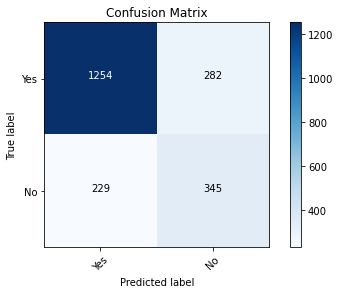

In [477]:
cm = confusion_matrix(y_true=y_test, y_pred=yprednn)
plot_confusion_matrix(cm=cm, classes=['Yes', 'No'], title='Confusion Matrix')

# # Vemos que performa mejor con la anterior opción, la red con una estructura [64,32,1]